In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import shapely
import os
import geopandas as gd
# from shapely import Point
from scipy.spatial import cKDTree
import branca.colormap as cm
from branca.element import Template, MacroElement
import warnings
warnings.filterwarnings('ignore')
from shapely.validation import make_valid
import matplotlib
%matplotlib inline
import matplotlib.patheffects as pe
import adjustText as aT
import pdb
from collections import OrderedDict

### User Defined Functions

In [2]:
# function for generating mandal maps

def mandal_plot(df):
    
    for ac in df['AC_x'].unique():
    
        try:
            
            df1 = df.dissolve('Mandal').reset_index()

            fig, ax = plt.subplots(1,1, figsize=(10,10))
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

            cmap = plt.cm.Set1
            df1.plot(cmap=cmap, ax=ax, linewidth=0.25, edgecolor='black')

            plt.title(f' AC - {ac} (Sabalgarh) || Mandal Boundary',fontsize = 15)

            legend_labels = df1['Mandal'].to_list()
            legend_colors = cmap(np.linspace(0, 1, len(legend_labels)))

            lines = [Line2D([0], [0], marker="s", markersize=10,
                        markeredgecolor='black', linewidth=0,color =c) for c in legend_colors]
            #         labels = [x for x in color_dict.keys()]

            plt.legend(lines,legend_labels,prop={'size': 15},framealpha=0,handletextpad=0.1,
                       bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.2)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Final maps\VS 2018\Mandal'+'\\'+'AC_'+str(ac)+'.png',bbox_inches='tight',dpi=400)

        except Exception as ee:
            print('AC:',ac,ee)

In [65]:
# function for generating mandal maps

def mandal_boundary_plot_segment(df):
    
    for ac in df['AC_x'].unique():
    
        try:
            
            legend_labels = df['Segment'].unique().tolist()
            color_dict = dict(df[['Segment','Segment hexcode']].values)
            color_dict = OrderedDict(sorted(color_dict.items()))
            
            df = df.loc[df['Mandal']!='Unmapped']
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            cmap = plt.cm.Set1
            
            # Plotting Mandals and color each category via cmap 
            vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]
            vill_shp_1.plot(ax=ax,color='lightgrey',linewidth=0.8, edgecolor='black')
            df.plot(ax=ax,column='Segment', color= df['Segment hexcode'], linewidth=1.2, edgecolor='black')            
            
            # Adding legend           
            
            lines = [Line2D([0], [0], marker="s", markersize=10,markeredgecolor='black', linewidth=0,color =c) for c in color_dict.values()]

            plt.legend(lines,legend_labels,prop={'size': 15},framealpha=0,handletextpad=0.1,bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.2)
            
#             Adding level      
            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid
            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
            za_points_2 = df.copy()
            za_points_2.set_geometry('centroid',inplace=True)
            
            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                       za_points_1.geometry.y,
                                       za_points_1['Mandal']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2

#                 fp = matplotlib.font_manager.FontProperties(fname=r"C:\Users\rahul\Downloads\firasans-regular.otf")

                texts.append(plt.text(x, y, label, horizontalalignment='center',
                                          fontsize = 7,#))
                                          path_effects=[pe.withStroke(linewidth=2,foreground="white")]))#,fontweight = 'bold',fontfamily='Arial',


#             plt.title(f' AC - {ac} || Mandal Boundary',fontsize = 15)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Outputs\Docket Maps\Mandal Segmenation\new\\'+str(ac)+'_AC.png',bbox_inches='tight',dpi=400)

        except Exception as ee:
            print('AC:',ac,ee)

In [186]:
# function for generating locality voteshare maps

def locality_vote_share_docket(df):
    
    for ac in df['AC_x'].unique():
    
        try:
            
            legend_labels = df['BJP VS 2018 Bucket'].unique().tolist()
            color_dict = dict(df[['BJP VS 2018 Bucket','Vote Share Hexcode']].values)
#             color_dict = OrderedDict(sorted(color_dict.items()))

            l=['0% to 20%','20% to 40%','40% to 60%','60% to 80%','80% to 100%','Votes Data Unavailable','Unmapped']
            color_dict = {k: color_dict[k] for k in l if k in color_dict}
#             print(color_dict)
            
#             df = df.loc[df['BJP VS 2018 Bucket']!='Votes Data Unavailable']
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            cmap = plt.cm.Set1
            
            # Plotting Mandals and color each category via cmap 
            vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]
            vill_shp_1.plot(ax=ax,color='lightgrey',linewidth=0.3, edgecolor='black')
            df.plot(ax=ax,column='BJP VS 2018 Bucket', color= df['Vote Share Hexcode'], linewidth=0.3, edgecolor='black') 
#             print(df)
            
            # Adding legend           
            
            lines = [Line2D([0], [0], marker="s", markersize=10,markeredgecolor='black', linewidth=0, color=c) for c in color_dict.values()]
            labels = [x for x in color_dict.keys()]
            plt.legend(lines,labels,prop={'size': 15},framealpha=0,handletextpad=0.1,bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.2)
            
#             Adding level      
            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid
            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
            za_points_2 = df.copy()
            za_points_2.set_geometry('centroid',inplace=True)
            
            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                       za_points_1.geometry.y,
                                       za_points_1['Locality No']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2

#                 fp = matplotlib.font_manager.FontProperties(fname=r"C:\Users\rahul\Downloads\firasans-regular.otf")

                texts.append(plt.text(x, y, label, horizontalalignment='center',
                                          fontsize = 4,#))
                                          path_effects=[pe.withStroke(linewidth=1,foreground="white")]))#,fontweight = 'bold',fontfamily='Arial',


#             plt.title(f' AC - {ac} || Mandal Boundary',fontsize = 15)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Outputs\Docket Maps\Vote Share\\'+str(ac)+'_VS.png',bbox_inches='tight',dpi=400)

        except Exception as ee:
            print('AC:',ac,ee)

In [187]:
# function for generating locality voteshare maps

def locality_margin_docket(df):
    
    for ac in df['AC_x'].unique():
    
        try:
            
            legend_labels = df['BJP Margin 2018 Bucket'].unique().tolist()
            color_dict = dict(df[['BJP Margin 2018 Bucket','Margin Hexcode']].values)
#             color_dict = OrderedDict(sorted(color_dict.items()))

            l=['< -20%','-20% to -10%','-10% to -5%','-5% to 0%','0% to 5%','5% to 10%','>10%','Votes Data Unavailable','Unmapped']
            color_dict = {k: color_dict[k] for k in l if k in color_dict}
#             print(color_dict)
            
#             df = df.loc[df['BJP VS 2018 Bucket']!='Votes Data Unavailable']
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            cmap = plt.cm.Set1
            
            # Plotting Mandals and color each category via cmap 
            vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]
            vill_shp_1.plot(ax=ax,color='lightgrey',linewidth=0.3, edgecolor='black')
            df.plot(ax=ax,column='BJP Margin 2018 Bucket', color= df['Margin Hexcode'], linewidth=0.3, edgecolor='black') 
#             print(df)
            
            # Adding legend           
            
            lines = [Line2D([0], [0], marker="s", markersize=10,markeredgecolor='black', linewidth=0, color=c) for c in color_dict.values()]
            labels = [x for x in color_dict.keys()]
            plt.legend(lines,labels,prop={'size': 15},framealpha=0,handletextpad=0.1,bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.2)
            
#             Adding level      
            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid
            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
            za_points_2 = df.copy()
            za_points_2.set_geometry('centroid',inplace=True)
            
            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                       za_points_1.geometry.y,
                                       za_points_1['Locality No']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2

#                 fp = matplotlib.font_manager.FontProperties(fname=r"C:\Users\rahul\Downloads\firasans-regular.otf")

                texts.append(plt.text(x, y, label, horizontalalignment='center',
                                          fontsize = 4,#))
                                          path_effects=[pe.withStroke(linewidth=1,foreground="white")]))#,fontweight = 'bold',fontfamily='Arial',


#             plt.title(f' AC - {ac} || Mandal Boundary',fontsize = 15)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Outputs\Docket Maps\Margin\\'+str(ac)+'_Margin.png',bbox_inches='tight',dpi=400)

        except Exception as ee:
            print('AC:',ac,ee)

In [5]:
# function for generating mandal maps

def mandal_boundary_plot(df):
    
    for ac in df['AC_x'].unique():
    
        try:
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            cmap = plt.cm.Set1
            
            # Plotting Mandals and color each category via cmap 
            df1 = df.dissolve('Mandal').reset_index()
            df1.plot(ax=ax,cmap=cmap, linewidth=1.2, edgecolor='black')
            df.plot(ax=ax,color='None',linewidth=0.1, edgecolor='grey')
            
            
            # Adding legend    
            legend_labels = df1['Mandal'].to_list()
            legend_colors = cmap(np.linspace(0, 1, len(legend_labels)))        
            lines = [Line2D([0], [0], marker="s", markersize=10,markeredgecolor='black', linewidth=0,color =c) for c in legend_colors]

            plt.legend(lines,legend_labels,prop={'size': 15},framealpha=0,handletextpad=0.1,bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.2)
            
#             Adding level      
            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid
            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
            za_points_2 = df.copy()
            za_points_2.set_geometry('centroid',inplace=True)
            
            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                       za_points_1.geometry.y,
                                       za_points_1['Village ID']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2

#                 fp = matplotlib.font_manager.FontProperties(fname=r"C:\Users\rahul\Downloads\firasans-regular.otf")

                texts.append(plt.text(x, y, label, horizontalalignment='center',
                                          fontsize = 1.5,#))
                                          path_effects=[pe.withStroke(linewidth=0.4,foreground="white")]))#,fontweight = 'bold',fontfamily='Arial',


            plt.title(f' AC - {ac} || Mandal Boundary',fontsize = 15)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Outputs\Maps for FPI Team'+'\\'+str(ac)+'\\'+'Village_With_Mandal_Boundary_In_AC_'+str(ac)+'.png',bbox_inches='tight',dpi=800)

        except Exception as ee:
            print('AC:',ac,ee)

In [6]:
# function for generating village boundary maps 

def village_plot(df):
        
    for ac in df['AC_POST'].unique():
    
        try:
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            cmap = plt.cm.Set1
            
            # Plotting Mandals and color each category via cmap 
            
            df.plot(ax=ax,color='grey',linewidth=0.1, edgecolor='black')
            
#             lines = [Line2D([0], [0], marker="s", markersize=10,markeredgecolor='black', linewidth=0,color =c) for c in legend_colors]

#             plt.legend(lines,legend_labels,prop={'size': 15},framealpha=0,handletextpad=0.1,bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.2)
            
#             Adding level      
            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid
            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
            za_points_2 = df.copy()
            za_points_2.set_geometry('centroid',inplace=True)
            
            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                       za_points_1.geometry.y,
                                       za_points_1['OID_']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2

#                 fp = matplotlib.font_manager.FontProperties(fname=r"C:\Users\rahul\Downloads\firasans-regular.otf")

                texts.append(plt.text(x, y, label, horizontalalignment='center',
                                          fontsize = 1.5,#))
                                          path_effects=[pe.withStroke(linewidth=0.4,foreground="white")]))#,fontweight = 'bold',fontfamily='Arial',


            plt.title(f' AC - {ac} || Village Boundary',fontsize = 15)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Outputs\Maps for FPI Team'+'\\'+str(ac)+'\\'+'Village_Without_Mandal_Boundary_In_AC_'+str(ac)+'.png',bbox_inches='tight',dpi=800)

        except Exception as ee:
            print('AC:',ac,ee)

In [7]:
# function for generating win loss maps


def win_loss_plot(df):

    for ac in df['AC_POST'].unique()[:]:

        try:
#             final_1 = final_.loc[final_['AC']==ac]
#             vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]
                
            ac_name = df['AC_NAME_PO'][0]
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

#             df = pd.merge(vill_shp_1, final_, right_on='Village ID', left_on='OID_', how='left').drop(['Village ID','AC','AC_NAME_PO'], axis=1)

            condition_list_1 = [df['Rank 1 Party'] == 'BJP',
                                  df['Rank 1 Party'] == 'INC',
                                  df['Rank 1 Party'] == 'BSP',
                                   ~df['Rank 1 Party'].isin(['BJP','INC','BSP'])]
            choice_list_1 = ['#FF9900','#00FFFF','#D3D3D3','#E75480']

            df['Hexcode_Rank 1 Party'] = np.select(condition_list_1,choice_list_1)

            color_dict = dict(df[['Rank 1 Party','Hexcode_Rank 1 Party']].values)

            df.plot(ax=ax, column='Rank 1 Party', color= df['Hexcode_Rank 1 Party'] ,linewidth=0.25, edgecolor='black')

            df['geometry'] = df['geometry'].apply(make_valid)
#             df_mandal_shp = df.dissolve('Mandal',as_index=False)

            # https://matplotlib.org/stable/tutorials/colors/colormaps.html
#             df_mandal_shp.boundary.plot(ax=ax, color=None ,linewidth=1.0, edgecolor='black')

            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid

            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
#             za_points_2 = df.copy()
#             za_points_2.set_geometry('centroid',inplace=True)

#             za_points_1 = df.copy()
#             za_points_1.set_geometry('rep',inplace=True)

            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                   za_points_1.geometry.y,
                                   za_points_1['OID_']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2,
                texts.append(plt.text(x, y, label,fontfamily='Arial',horizontalalignment='center',
                                      fontsize = 2.5,fontweight = 'bold',
                                      path_effects=[pe.withStroke(linewidth=0.3, foreground="white")]))


            plt.title(f'VS 2018 Elections || AC - {ac} ({ac_name}) || Village Level Win Loss',fontsize = 15)

            lines = [Line2D([0], [0], marker="s", markersize=10,
                            markeredgecolor='black', linewidth=0,color=c) for c in color_dict.values()]
            labels = [x for x in color_dict.keys()]

            plt.legend(lines,labels,prop={'size': 15},framealpha=0,handletextpad=0.1,
                           bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.5)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Final maps\VS 2018\Win Loss'+'\\'+'AC_'+str(ac)+'.png',bbox_inches='tight',dpi=600)

        except Exception as ee:
            print('AC:',ac,ee)

In [8]:
# function for generating win loss maps


def v_share_plot(df):
    from collections import OrderedDict
 
    for ac in df['AC_POST'].unique()[:]:

        try:
#             final_1 = final_.loc[final_['AC']==ac]
#             vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]
                
            ac_name = df['AC_NAME_PO'][0]
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

#             df = pd.merge(vill_shp_1, final_, right_on='Village ID', left_on='OID_', how='left').drop(['Village ID','AC','AC_NAME_PO'], axis=1)

            condition_list_1 = [df['BJP V_Share Buckets'] == '0% to 20%',
                                df['BJP V_Share Buckets'] == '20% to 40%',
                                df['BJP V_Share Buckets'] == '40% to 60%',
                                df['BJP V_Share Buckets'] == '60% to 80%',
                                df['BJP V_Share Buckets'] == '80% to 100%']
            choice_list_1 = ['#FF0000','#FF5C5C','#D0F0C0','#90EE90','#138808']

            df['Hexcode_V_Share'] = np.select(condition_list_1,choice_list_1)

            color_dict = dict(df[['BJP V_Share Buckets','Hexcode_V_Share']].values)
            keyorder = ['0% to 20%','20% to 40%','40% to 60%','60% to 80%','80% to 100%']
            color_dict = {k: color_dict[k] for k in keyorder if k in color_dict}


            df.plot(ax=ax, column='BJP V_Share Buckets', color= df['Hexcode_V_Share'] ,linewidth=0.25, edgecolor='black')

            df['geometry'] = df['geometry'].apply(make_valid)
#             df_mandal_shp = df.dissolve('Mandal',as_index=False)

            # https://matplotlib.org/stable/tutorials/colors/colormaps.html
#             df_mandal_shp.boundary.plot(ax=ax, color=None ,linewidth=1.0, edgecolor='black')

            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid

            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
#             za_points_2 = df.copy()
#             za_points_2.set_geometry('centroid',inplace=True)

#             za_points_1 = df.copy()
#             za_points_1.set_geometry('rep',inplace=True)

            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                   za_points_1.geometry.y,
                                   za_points_1['OID_']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2,
                texts.append(plt.text(x, y, label,fontfamily='Arial',horizontalalignment='center',
                                      fontsize = 2.5,fontweight = 'bold',
                                      path_effects=[pe.withStroke(linewidth=0.5, foreground="white")]))


            plt.title(f'VS 2018 Elections || AC - {ac} ({ac_name}) || Village Level BJP VS',fontsize = 15)

            lines = [Line2D([0], [0], marker="s", markersize=10,
                            markeredgecolor='black', linewidth=0,color=c) for c in color_dict.values()]
            labels = [x for x in color_dict.keys()]

            plt.legend(lines,labels,prop={'size': 15},framealpha=0,handletextpad=0.1,
                           bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.5)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Final maps\VS 2018\Vote Share'+'\\'+'AC_'+str(ac)+'.png',bbox_inches='tight',dpi=400)

        except Exception as ee:
            print('AC:',ac,ee)

In [9]:
# function for generating win loss maps


def margin_plot(df):
    from collections import OrderedDict
 
    for ac in df['AC_POST'].unique()[:]:

        try:
#             final_1 = final_.loc[final_['AC']==ac]
#             vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]
                
            ac_name = df['AC_NAME_PO'][0]
            
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

#             df = pd.merge(vill_shp_1, final_, right_on='Village ID', left_on='OID_', how='left').drop(['Village ID','AC','AC_NAME_PO'], axis=1)

            condition_list_1 = [df['BJP Margin Buckets'] == '< -40%',
                                df['BJP Margin Buckets'] == '-40% to -20%',
                                df['BJP Margin Buckets'] == '-20% to 0%',
                                df['BJP Margin Buckets'] == '0% to 20%',
                                df['BJP Margin Buckets'] == '20% to 40%',
                                df['BJP Margin Buckets'] == '> 40%']
            choice_list_1 = ['#B20000','#FF0000','#FF5C5C','#EBFB1F','#90EE90','#138808']

            df['Hexcode_Margin'] = np.select(condition_list_1,choice_list_1)
            

            color_dict = dict(df[['BJP Margin Buckets','Hexcode_Margin']].values)
            keyorder = ['< -40%','-40% to -20%','-20% to 0%','0% to 20%','20% to 40%', '> 40%']
            color_dict = {k: color_dict[k] for k in keyorder if k in color_dict}
#             print(color_dict)


            df.plot(ax=ax, column='BJP Margin Buckets', color= df['Hexcode_Margin'] ,linewidth=0.25, edgecolor='black')

            df['geometry'] = df['geometry'].apply(make_valid)
#             df_mandal_shp = df.dissolve('Mandal',as_index=False)

            # https://matplotlib.org/stable/tutorials/colors/colormaps.html
#             df_mandal_shp.boundary.plot(ax=ax, color=None ,linewidth=1.0, edgecolor='black')

            df['rep'] = df['geometry'].representative_point()
            df['centroid'] = df['geometry'].centroid

            za_points_1 = df.copy()
            za_points_1.set_geometry('rep',inplace=True)
#             za_points_2 = df.copy()
#             za_points_2.set_geometry('centroid',inplace=True)

#             za_points_1 = df.copy()
#             za_points_1.set_geometry('rep',inplace=True)

            texts = []
            for x, y, label in zip(za_points_1.geometry.x,
                                   za_points_1.geometry.y,
                                   za_points_1['OID_']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2,
                texts.append(plt.text(x, y, label,fontfamily='Arial',horizontalalignment='center',
                                      fontsize = 2.5,fontweight = 'bold',
                                      path_effects=[pe.withStroke(linewidth=0.5, foreground="white")]))


            plt.title(f'VS 2018 Elections || AC - {ac} ({ac_name}) || Village Level BJP Margin',fontsize = 15)

            lines = [Line2D([0], [0], marker="s", markersize=10,
                            markeredgecolor='black', linewidth=0,color=c) for c in color_dict.values()]
            labels = [x for x in color_dict.keys()]

            plt.legend(lines,labels,prop={'size': 15},framealpha=0,handletextpad=0.1,
                           bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.5)

            ax.axis('off')
            plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Final maps\VS 2018\Margin'+'\\'+'AC_'+str(ac)+'.png',bbox_inches='tight',dpi=400)

        except Exception as ee:
            print('AC:',ac,ee)

In [10]:
# function for margin bucketing

def margin_bucketing(x):
    if x < -40:
        return '< -40%'
    
    elif x >= -40 and x < -20:
        return '-40% to -20%'
    
    elif x >= -20 and x < 0:
        return '-20% to 0%'
       
    elif x >= 0 and x < 20:
        return '0% to 20%'
    
    elif x >= 20 and x < 40:
        return '20% to 40%'

    elif x >= 40:
        return '> 40%'
    
    else:
        return '-'

In [11]:
# function for vote share bucketing

def v_share_bucketing(x):
    if x >= 0 and x <= 20:
        return '0% to 20%'
    
    elif x > 20 and x <= 40:
        return '20% to 40%'
    
    elif x > 40 and x <= 60:
        return '40% to 60%'
    
    elif x > 60 and x <= 80:
        return '60% to 80%'
    
    elif x > 80 and x <= 100:
        return '80% to 100%'
    
    else:
        return '-'

### Creating Final Maps data using Integrated dataframe and Base Segmentation Data

In [12]:
# importig Village Shape file

vill_shp = gd.read_file(r"D:\NaMo\00_Shapefiles-20221219T120738Z-001\00_Shapefiles\SHP_MadhyaPradesh\MADHYA PRADESH\VILLAGE_TOWN.shp")
vill_shp = vill_shp[['OID_','AC_POST','AC_NAME_PO','NAME11','geometry']]

In [13]:
vill_shp.head()

OID_  AC_POST AC_NAME_PO       NAME11  \
0     0        8      Ambah    Ludhawali   
1     1        8      Ambah       Bindwa   
2     2        8      Ambah  Ratan Basai   
3     3        8      Ambah      Rachhed   
4     4        8      Ambah       Raipur   

                                            geometry  
0  POLYGON ((78.34131 26.86485, 78.34151 26.86362...  
1  POLYGON ((78.37589 26.80898, 78.37615 26.80994...  
2  POLYGON ((78.18221 26.79842, 78.17918 26.80278...  
3  POLYGON ((78.27531 26.82826, 78.27629 26.82761...  
4  POLYGON ((78.43718 26.78249, 78.43639 26.78085...

In [14]:
# # importing integrated dataframe - village to locality mapping

# vill_loc = pd.read_csv(r'D:\NaMo\Madhya Pradesh\Census Maps\MP Census Map Integrated DataFrame - Sheet1.csv')
# vill_loc = vill_loc[['AC','Village ID','Village Name','Final Locality','Locality']].drop_duplicates()
# vill_loc['Final Locality'] = vill_loc['Final Locality'].str.split('&&')
# vill_loc = vill_loc.explode('Final Locality').drop_duplicates()

# vill_loc['Final Locality'] = vill_loc['Final Locality'].str.split('+')
# vill_loc = vill_loc.explode('Final Locality').drop_duplicates()

# vill_loc['Final Locality'] = vill_loc['Final Locality'].str.strip()
# vill_loc['Final Locality'] = vill_loc['Final Locality'].str.upper()
# vill_loc = vill_loc.sort_values(by=['AC','Village ID'])

In [15]:
vill_loc = pd.read_csv(r"D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Inputs\Copy2 _ Village to Locality Mapping final(using modularized code)  - Village to Locality mapping(after fixing multipolygon)_v1.csv")

In [184]:
vill_loc = vill_loc[['AC','Village ID','Village Name','Final Locality']].drop_duplicates()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.split('&&')
vill_loc = vill_loc.explode('Final Locality').drop_duplicates()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.upper()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.strip()
# vill_loc = vill_loc.rename(columns={'AC No':'AC'})

vill_loc['Final Locality'] = vill_loc['Final Locality'].str.split('+')
vill_loc = vill_loc.explode('Final Locality').drop_duplicates()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.upper()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.strip()
vill_loc['Locality'] = vill_loc['Final Locality']

In [17]:
vill_loc.head()

AC  Village ID Village Name      Final Locality            Locality
0   1        2527    Khirkhiri   खिरखिरी KHIRKHIRI   खिरखिरी KHIRKHIRI
1   1        2612       Biloni       विलोनी BILONY       विलोनी BILONY
2   1        2654      Bagdari      बगदरी BAGADARI      बगदरी BAGADARI
3   1        2670    Khojipura  खोजीपुरा KHOJIPURA  खोजीपुरा KHOJIPURA
4   1        2730      Bagdiya     बगदिया BAGADIYA     बगदिया BAGADIYA

In [18]:
# importing base retro data

base_retro = pd.read_csv(r'D:\NaMo\Madhya Pradesh\Base Segmentation Data\Final OP\2018_base_segmentation_MP.csv')
base_retro['Locality'] = base_retro['Locality'].str.upper()

In [19]:
base_retro = base_retro.rename(columns={'Mandal 01-Dec-22':'Mandal'})

In [20]:
base_retro.head()

AC  booth 2022  2018 Mapped PS  Mandal  No. of electors_x  \
0   1           1               1  Manpur                547   
1   1           1               1  Manpur                547   
2   1           1               1  Manpur                547   
3   1           1               1  Manpur                547   
4   1           1               1  Manpur                547   

            Locality                    name                     party  votes  \
0  खिरखिरी KHIRKHIRI   durga lal vijay vakil    bharatiya janata party  213.0   
1  खिरखिरी KHIRKHIRI             babu jandel  indian national congress  157.0   
2  खिरखिरी KHIRKHIRI      tulsinarayan meena       bahujan samaj party   41.0   
3  खिरखिरी KHIRKHIRI                    nota                      NOTA    7.0   
4  खिरखिरी KHIRKHIRI  diptee sayyad zfar ali               independent    4.0   

     year  Ratio  Adjusted Votes  Adjusted Electors mapped_party  
0  2018.0    1.0           213.0              547.0          BJP  
1  2018.0    1.0           157.0              547.0          INC  
2  2018.0    1.0            41.0              547.0          BSP  
3  2018.0    1.0             7.0              547.0       Others  
4  2018.0    1.0             4.0              547.0          IND

In [21]:
# acs = [156,56,58,53,163,182,24,87,91,95,96,101,106]
# acs.sort()
# acs

In [22]:
mandal_level = pd.read_csv(r"D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Inputs\20230427 [MP] AC Docket Maps Requirement - Mandal Segmentation.csv")
mandal_level = mandal_level.sort_values(by=['AC','Mandal No.'])

In [23]:
mandal_level.head()

AC Mandal_key Segment  Mandal No. Mandal Name Segment hexcode
512   1   1_Manpur      B+           1      Manpur         #e3ff00
513   1  1_Premsar      B+           2     Premsar         #e3ff00
514   1  1_Sheopur      B+           3     Sheopur         #e3ff00
511   1   1_Baroda      B+           4      Baroda         #e3ff00
699   2  2_Veerpur      B+           1     Veerpur         #e3ff00

In [80]:
locality_level = pd.read_csv(r"D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Inputs\20230427 [MP] AC Docket Maps Requirement - BJP Vote Shares and Margin Heat Map.csv")

In [85]:
locality_level['Locality'] = locality_level['Locality'].str.strip().str.upper()
locality_level = locality_level[['AC','Locality','BJP VS 2018 Bucket','Vote Share Hexcode','BJP Margin 2018 Bucket','Margin Hexcode','Locality_idex']].fillna(0)
locality_level['Locality_idex'] = locality_level['Locality_idex'].astype(int)

In [86]:
locality_level.head()

AC                       Locality BJP VS 2018 Bucket Vote Share Hexcode  \
0  207                       UNMAPPED         60% to 80%            #1fc600   
1    1  अग्रवाल पंचायती नोहरा श्योपुर          0% to 20%            #ff0000   
2    1                अजापुरा AJAPURA         40% to 60%            #8cff32   
3    1                   अडवाड ADAVAD         20% to 40%            #ff5252   
4    1                    अडूसा ADUSA          0% to 20%            #ff0000   

  BJP Margin 2018 Bucket Margin Hexcode  Locality_idex  
0                   >10%        #089000              0  
1                 < -20%        #a70000            204  
2                   >10%        #089000            215  
3           -20% to -10%        #ff0000            117  
4                 < -20%        #a70000             63

Completed AC: 10
Complete...........................................................................


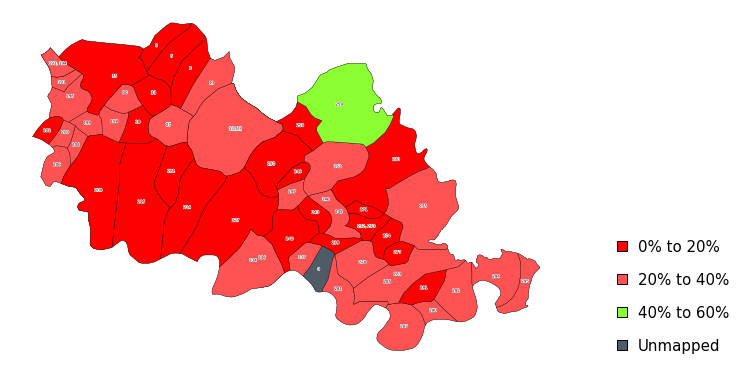

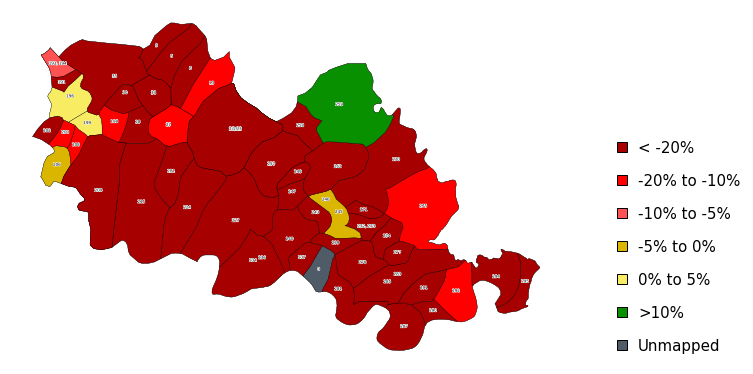

In [188]:
final_data = pd.DataFrame()
final_mandal_plot = pd.DataFrame()

ac_ = 'AC_x'
level = 'Village ID'
# locality = 'Locality'
party = 'mapped_party'
candidate = 'name'
mapped_year = '2018 Mapped PS'
votes = 'Adjusted Votes'

for i in vill_loc['AC'].unique()[9:10]: #vill_loc['AC'].unique()[:]
    try:
        a = i
        base_retro_1 = base_retro.loc[base_retro['AC']==i]
        vill_loc_1 = vill_loc.loc[vill_loc['AC']==i]
        vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==i]
        mandal_level_1 = mandal_level.loc[mandal_level['AC']==i]
        locality_level_1 = locality_level.loc[locality_level['AC']==i]
        
#         village_plot(vill_shp_1)

        df = pd.merge(vill_loc_1, base_retro_1, right_on='Locality', left_on='Final Locality', how='left')#.fillna(0)
        temp1 = df[~df['Locality_y'].isnull()]

        temp2 = df[df['Locality_y'].isnull()]
        temp2['Locality_x'] = temp2['Locality_x'].str.split('+')
        temp2 = temp2.explode('Locality_x')
        temp2['Locality_x'] = temp2['Locality_x'].str.strip()
        temp2 = temp2.drop_duplicates()
        temp2['Final Locality'] = temp2['Locality_x']
        temp2['Final Locality'] = temp2['Final Locality'].str.upper()
        temp2 = temp2[['AC_x','Village ID','Village Name','Final Locality','Locality_x']].drop_duplicates()

        df_temp = temp2.merge(base_retro_1, left_on='Final Locality', right_on='Locality', how='left')

        df1 = pd.concat([df_temp.drop(['Locality'], axis=1), temp1.drop(['Locality_x'], axis=1)]).drop(['AC_y','AC','Locality_x', 'Locality_y'], axis=1)

        df2 = pd.merge(vill_shp_1[['OID_','geometry']], df1, right_on='Village ID', left_on='OID_', how='left')
#         df2[ac_] = df2[ac_].astype(int)
#         df2[mapped_year] = df2[mapped_year].astype(int)

        final_mandal_plot = pd.concat([final_mandal_plot, df2])

#         mandal_boundary_plot(df2)
        
        df2['Mandal'] = df2['Mandal'].fillna('Unmapped')
        df2_mandal = df2.dissolve('Mandal', as_index=False).merge(mandal_level_1, left_on='Mandal', right_on='Mandal Name', how='left')[['AC_x','Mandal','geometry','Segment','Segment hexcode']]
        df2_mandal['Segment'] = df2_mandal['Segment'].fillna('Unmapped')
        df2_mandal['Segment hexcode'] = df2_mandal['Segment hexcode'].fillna('#F5F5F5')
        
#         mandal_boundary_plot_segment(df2_mandal)

        df2_locality = df2.dissolve('Final Locality', as_index=False).merge(locality_level_1, left_on='Final Locality', right_on='Locality', how='left')[['AC_x','Final Locality','geometry','BJP VS 2018 Bucket','Vote Share Hexcode','BJP Margin 2018 Bucket','Margin Hexcode','Locality_idex']]

        df2_locality['BJP VS 2018 Bucket'] = df2_locality['BJP VS 2018 Bucket'].fillna('Unmapped')
        df2_locality['Vote Share Hexcode'] = df2_locality['Vote Share Hexcode'].fillna('#4f5b66')
        df2_locality['BJP Margin 2018 Bucket'] = df2_locality['BJP Margin 2018 Bucket'].fillna('Unmapped')
        df2_locality['Margin Hexcode'] = df2_locality['Margin Hexcode'].fillna('#4f5b66')
        df2_locality['Locality_idex'] = df2_locality['Locality_idex'].fillna(0)
        df2_locality['Locality_idex'] = df2_locality['Locality_idex'].astype(int)
        
        df2_locality_ = df2_locality.groupby(df2_locality['geometry'].to_wkt(), as_index=False).agg({'Final Locality' :'&&'.join,'Locality_idex' : lambda x: ", ".join(set(map(str,x)))})

        df2_locality_['Final Locality'] = df2_locality_['Final Locality'].str.split('&&')
        df2_locality_ = df2_locality_.explode('Final Locality')
        df2_locality_.columns = ['Locality','Locality No']
        df2_locality_1 = df2_locality.merge(df2_locality_, left_on='Final Locality', right_on='Locality', how='inner')
        
        locality_vote_share_docket(df2_locality_1)
        locality_margin_docket(df2_locality_1)

#         df3 = df2.groupby([ac_,level,party,candidate], as_index=False).agg({mapped_year:lambda x: "+".join(set(map(str,x))),votes:'sum'})

#         lst = []
#         for i in df3[level].unique()[:]:
#             try:
#                 df4 = df3.loc[df3[level]==i]
#                 df4['Rank'] = df4[votes].rank(ascending=False, method='first')

#                 total_votes = df4[votes].sum()               
#                 df4['Total Votes'] = total_votes

#                 r1_party = df4.loc[df4['Rank']==1][party].values[0]
#                 r1_votes = df4.loc[df4['Rank']==1][votes].values[0]

#                 df4['Rank 1 Party'] = r1_party
#                 df4['Rank 1 Votes'] = r1_votes

#                 if len(df4.loc[df4['Rank']==2]) ==0 :
#                     r2_party = '-'
#                     r2_votes = 0

#                 else:            
#                     r2_party = df4.loc[df4['Rank']==2][party].values[0]
#                     r2_votes = df4.loc[df4['Rank']==2][votes].values[0]

#                 df4['Rank 2 Party'] = r2_party
#                 df4['Rank 2 Votes'] = r2_votes

#                 if len(df4.loc[df4[party]=='BJP']) == 0:
#                     bjp_votes = 0

#                 else:
#                     bjp_votes = df4.loc[df4[party]=='BJP'][votes].values[0]

#                 df4['BJP Votes'] = bjp_votes

#                 df4['BJP Vote Share %'] = round(df4['BJP Votes'] / df4['Total Votes'] * 100 ,2)

#                 if df4.loc[df4['Rank']==1][party].values[0] == 'BJP':
#                     bjp_margin = bjp_votes - r2_votes
#                 else:
#                     bjp_margin = bjp_votes - r1_votes

#                 df4['BJP Margin Votes'] = bjp_margin
#                 df4['BJP Margin %'] = round(df4['BJP Margin Votes'] / df4['Total Votes'] * 100 ,2)

#                 df4 = df4.fillna(0)
#                 df5 = df4.drop([party,candidate,votes,'Rank'], axis=1).drop_duplicates()

#                 if len(df5) > 1:
#                     df5['Mapped PS 2018'] = '+'.join(df5['Mapped PS 2018'].str.split('+').sum())
#                     df5 = df5.drop_duplicates()

#                 lst.append(df5)

#             except Exception as ee:
#                 print('AC:',ac,'Village:',i,'Error:',ee)

#         win_loss = pd.concat(lst)
#         win_loss_1 = vill_shp_1.merge(win_loss, left_on='OID_', right_on='Village ID', how='left')
        
#         win_loss_1['BJP V_Share Buckets'] = win_loss_1['BJP Vote Share %'].apply(lambda x: v_share_bucketing(x))
#         

#         final_data = pd.concat([final_data,win_loss_1])
        
#         win_loss_plot(win_loss_1)
#         v_share_plot(win_loss_1)
#         margin_plot(win_loss_1)
        
        print('Completed AC:',a)
        
    except Exception as ee:
        print('AC:',i,ee)
        
print('Complete...........................................................................')

In [722]:
final_data.to_clipboard(index=False)

In [140]:
final_mandal_plot.to_csv(r'D:\NaMo\Madhya Pradesh\Census Maps\Mandal Boundary Plot(For DE).csv', index=False)

In [20]:
final_mandal_plot.to_clipboard(index=False)

### Sub AC Deck Maps

In [183]:
vill_loc = pd.read_csv(r"D:\NaMo\Madhya Pradesh\Census Maps\Final maps\VS 2018\Copy2 _ Village to Locality Mapping final(using modularized code)  - Final.csv")

In [184]:
vill_loc = vill_loc[['AC No','Village ID','Village Name','Final Locality']].drop_duplicates()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.split('&&')
vill_loc = vill_loc.explode('Final Locality').drop_duplicates()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.upper()
vill_loc['Final Locality'] = vill_loc['Final Locality'].str.strip()
vill_loc = vill_loc.rename(columns={'AC No':'AC'})
vill_loc['Locality'] = vill_loc['Final Locality']

In [175]:
locality_level = pd.read_csv(r"D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Inputs\20230130[MP] Sub AC - Deck Maps Request - 3. Locality_Level.csv")

In [177]:
locality_level.head()

AC                       locality Winner VS2018 Winner VS2018 Hex code  \
0   1  अग्रवाल पंचायती नोहरा श्योपुर           INC                #6d9eeb   
1   1                अजापुरा AJAPURA           BJP                #ff9900   
2   1                   अडवाड ADAVAD           INC                #6d9eeb   
3   1                    अडूसा Adusa           INC                #6d9eeb   
4   1              अभयपुरा ABHAYPURA           INC                #6d9eeb   

  Winner LS2019 Winner LS2019 Hexcode Segment Segment hexcode Locality_no  \
0           INC               #6d9eeb       B         #ff003c         148   
1           BJP               #ff9900       A         #00bfff         157   
2           BSP               #0000ff      B+         #e3ff00          89   
3           INC               #6d9eeb       B         #ff003c          47   
4           INC               #6d9eeb      B+         #e3ff00         151   

  Mandal Name Mandal No.  Unnamed: 11  Unnamed: 12                 Source  \
0     Sheopur          3          NaN          NaN  Locality Segmentation   
1     Premsar          2          NaN          NaN             CAPI Sheet   
2     Premsar          2          NaN          NaN                    NaN   
3      Manpur          1          NaN          NaN                    NaN   
4     Sheopur          3          NaN          NaN                    NaN   

  Relevant columns                                               Link  
0        A,B,C,D,E  https://docs.google.com/spreadsheets/d/1_icidG...  
1            F,G,H  https://docs.google.com/spreadsheets/d/13eBd1K...  
2              NaN                                                NaN  
3              NaN                                                NaN  
4              NaN                                                NaN

In [176]:
mandal_level = pd.read_csv(r"D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Inputs\20230130[MP] Sub AC - Deck Maps Request - 2. Mandal_Level.csv")

In [173]:
mandal_level.head()

AC Mandal Name Winner VS2018 Winner VS2018 Hex code Winner LS2019  \
0   1      Baroda           INC                #6d9eeb           BJP   
1   1      Manpur           INC                #6d9eeb           BJP   
2   1     Premsar           INC                #6d9eeb           BJP   
3   1     Sheopur           INC                #6d9eeb           BJP   
4  10    Unmapped           BSP                    NaN           BJP   

  Winner LS2019 Hexcode Segment Segment hexcode Mandal No.  Unnamed: 9  \
0               #ff9900      B+         #e3ff00          4         NaN   
1               #ff9900      B+         #e3ff00          1         NaN   
2               #ff9900      B+         #e3ff00          2         NaN   
3               #ff9900      B+         #e3ff00          3         NaN   
4                   NaN      B+             NaN          -         NaN   

   Unnamed: 10               Source Relevant columns  \
0          NaN  Mandal Segmentation        A,B,C,D,E   
1          NaN           CAPI Sheet                F   
2          NaN                  NaN              NaN   
3          NaN                  NaN              NaN   
4          NaN                  NaN              NaN   

                                                Link  
0  https://docs.google.com/spreadsheets/d/1AQ-kaC...  
1  https://docs.google.com/spreadsheets/d/13eBd1K...  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [202]:
final_data = pd.DataFrame()
final_mandal_plot = pd.DataFrame()

ac_ = 'AC_x'
level = 'Village ID'
# locality = 'Locality'
party = 'mapped_party'
candidate = 'name'
mapped_year = '2018 Mapped PS'
votes = 'Adjusted Votes'

for i in mandal_level['AC'].unique()[:1]: #vill_loc['AC'].unique()[:]
    try:
        a = i
        
        vill_loc_1 = vill_loc.loc[vill_loc['AC']==i]
        vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==i]
        
        locality_level_1 = locality_level.loc[locality_level['AC']==i]
        
        mandal_level_1 = mandal_level.loc[mandal_level['AC']==i]
        
        vill_man = pd.merge(vill_loc_1, locality_level_1, left_on='Final Locality', right_on='locality', how='left')
        mandal_shp = pd.merge(vill_shp_1, vill_man, left_on='OID_', right_on='Village ID', how='left').dissolve('Mandal Name', as_index=False)[['Mandal Name', 'Mandal No.','geometry']]
        man_win_seg_shp = pd.merge(mandal_shp, mandal_level_1, left_on='Mandal No.', right_on='Mandal No.', how='left')
        

#         df = pd.merge(vill_loc_1, base_retro_1, right_on='Locality', left_on='Final Locality', how='left')#.fillna(0)
#         temp1 = df[~df['Locality_y'].isnull()]

#         temp2 = df[df['Locality_y'].isnull()]
#         temp2['Locality_x'] = temp2['Locality_x'].str.split('+')
#         temp2 = temp2.explode('Locality_x')
#         temp2['Locality_x'] = temp2['Locality_x'].str.strip()
#         temp2 = temp2.drop_duplicates()
#         temp2['Final Locality'] = temp2['Locality_x']
#         temp2['Final Locality'] = temp2['Final Locality'].str.upper()
#         temp2 = temp2[['AC_x','Village ID','Village Name','Final Locality','Locality_x']].drop_duplicates()

#         df_temp = temp2.merge(base_retro_1, left_on='Final Locality', right_on='Locality', how='left')

#         df1 = pd.concat([df_temp.drop(['Locality'], axis=1), temp1.drop(['Locality_x'], axis=1)]).drop(['AC_y','AC','Locality_x', 'Locality_y'], axis=1)

#         df2 = pd.merge(vill_shp_1[['OID_','geometry']], df1, right_on='Village ID', left_on='OID_', how='left')
#         df2[ac_] = df2[ac_].astype(int)
#         df2[mapped_year] = df2[mapped_year].astype(int)

#         final_mandal_plot = pd.concat([final_mandal_plot, df2])

#         mandal_boundary_plot(df2)

#         df3 = df2.groupby([ac_,level,party,candidate], as_index=False).agg({mapped_year:lambda x: "+".join(set(map(str,x))),votes:'sum'})

#         lst = []
#         for i in df3[level].unique()[:]:
#             try:
#                 df4 = df3.loc[df3[level]==i]
#                 df4['Rank'] = df4[votes].rank(ascending=False, method='first')

#                 total_votes = df4[votes].sum()               
#                 df4['Total Votes'] = total_votes

#                 r1_party = df4.loc[df4['Rank']==1][party].values[0]
#                 r1_votes = df4.loc[df4['Rank']==1][votes].values[0]

#                 df4['Rank 1 Party'] = r1_party
#                 df4['Rank 1 Votes'] = r1_votes

#                 if len(df4.loc[df4['Rank']==2]) ==0 :
#                     r2_party = '-'
#                     r2_votes = 0

#                 else:            
#                     r2_party = df4.loc[df4['Rank']==2][party].values[0]
#                     r2_votes = df4.loc[df4['Rank']==2][votes].values[0]

#                 df4['Rank 2 Party'] = r2_party
#                 df4['Rank 2 Votes'] = r2_votes

#                 if len(df4.loc[df4[party]=='BJP']) == 0:
#                     bjp_votes = 0

#                 else:
#                     bjp_votes = df4.loc[df4[party]=='BJP'][votes].values[0]

#                 df4['BJP Votes'] = bjp_votes

#                 df4['BJP Vote Share %'] = round(df4['BJP Votes'] / df4['Total Votes'] * 100 ,2)

#                 if df4.loc[df4['Rank']==1][party].values[0] == 'BJP':
#                     bjp_margin = bjp_votes - r2_votes
#                 else:
#                     bjp_margin = bjp_votes - r1_votes

#                 df4['BJP Margin Votes'] = bjp_margin
#                 df4['BJP Margin %'] = round(df4['BJP Margin Votes'] / df4['Total Votes'] * 100 ,2)

#                 df4 = df4.fillna(0)
#                 df5 = df4.drop([party,candidate,votes,'Rank'], axis=1).drop_duplicates()

#                 if len(df5) > 1:
#                     df5['Mapped PS 2018'] = '+'.join(df5['Mapped PS 2018'].str.split('+').sum())
#                     df5 = df5.drop_duplicates()

#                 lst.append(df5)

#             except Exception as ee:
#                 print('AC:',ac,'Village:',i,'Error:',ee)

#         win_loss = pd.concat(lst)
#         win_loss_1 = vill_shp_1.merge(win_loss, left_on='OID_', right_on='Village ID', how='left')
        
#         win_loss_1['BJP V_Share Buckets'] = win_loss_1['BJP Vote Share %'].apply(lambda x: v_share_bucketing(x))
#         win_loss_1['BJP Margin Buckets'] = win_loss_1['BJP Margin %'].apply(lambda x: margin_bucketing(x))

#         final_data = pd.concat([final_data,win_loss_1])
        
#         win_loss_plot(win_loss_1)
#         v_share_plot(win_loss_1)
#         margin_plot(win_loss_1)
        
        print('Completed AC:',a)
        
    except Exception as ee:
        print('AC:',i,ee)
        
print('Complete...........................................................................')

Completed AC: 1
Complete...........................................................................


In [290]:

def mandal_wise_winner_plot(df):
    
    try:
        ac = df['AC'][0]
        
        fig, ax = plt.subplots(1,1, figsize=(10,10))
        cmap = plt.cm.Set1

        vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]
        
        vill_shp_1.plot(ax=ax,color='lightgrey',linewidth=0.8, edgecolor='black')
#         df.plot(ax=ax,column='Winner LS2019', color= df['Winner LS2019 Hexcode'], linewidth=0.8, edgecolor='black')
        df.plot(ax=ax,column='Winner VS2018', color= df['Winner VS2018 Hex code'], linewidth=0.8, edgecolor='black')



        df['rep'] = df['geometry'].representative_point()
        df['centroid'] = df['geometry'].centroid
        za_points_1 = df.copy()
        za_points_1.set_geometry('rep',inplace=True)
        za_points_2 = df.copy()
        za_points_2.set_geometry('centroid',inplace=True)

        texts = []
        for x, y, label in zip(za_points_1.geometry.x,
                                   za_points_1.geometry.y,
                                   za_points_1['Mandal No.']):#+za_points_2.geometry.x)/2,+za_points_2.geometry.y)/2

#                 fp = matplotlib.font_manager.FontProperties(fname=r"C:\Users\rahul\Downloads\firasans-regular.otf")

            texts.append(plt.text(x, y, label, horizontalalignment='center',
                                      fontsize = 10,#))
                                      path_effects=[pe.withStroke(linewidth=2,foreground="white")]))#,fontweight = 'bold',fontfamily='Arial',


#         plt.title(f' AC - {ac} || Mandal Boundary',fontsize = 15)

        ax.axis('off')
#         plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Outputs\Mandal Wise Winner\LS 2019'+'\\'+str(ac)+'_ac_LS2019.png',bbox_inches='tight',dpi=400)
        plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Sub AC Deck Maps V2\Outputs\Mandal Wise Winner\VS 2018'+'\\'+str(ac)+'_ac_VS2018.png',bbox_inches='tight',dpi=400)


    except Exception as ee:
        print('AC:',ac,ee)

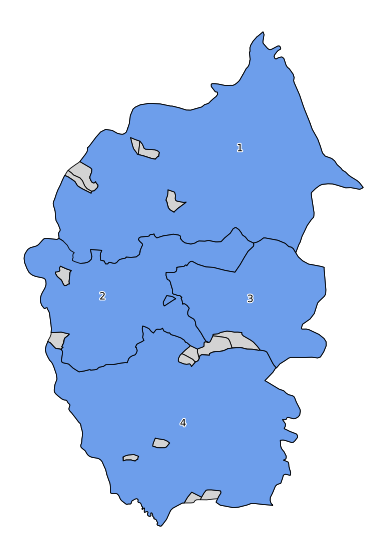

In [291]:
mandal_wise_winner_plot(man_win_seg_shp)

In [562]:
vill_loc_1.to_clipboard(index=False)

In [564]:
base_retro_1.to_clipboard(index=False)

In [548]:
lst = []
for i in 'सागौनी बुन्‍देला sagouni bundela':
    lst.append(ord(i))
print(sum(lst))

42814


In [547]:
lst = []
for i in 'सागौनी बुन्‍देला SAGOUNI BUNDELA':
    lst.append(ord(i))
print(sum(lst))

42366


In [544]:
sum(lst)

42814

In [26]:
import numpy as np
import pandas as pd
import geopandas as gpd

import os

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D

import adjustText as aT

import pdb

import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd
import folium
import numpy as np
import shapely
import os
import geopandas as gd
# from shapely import Point
from scipy.spatial import cKDTree
import branca.colormap as cm
from branca.element import Template, MacroElement
import warnings
warnings.filterwarnings('ignore')
from shapely.validation import make_valid

### User Defined Functions

In [374]:
"""Function for Finding 3 nearest Villages"""

def get_nearest_villages(v_shp):
    v_shp['centroid']=v_shp['geometry']\
        .to_crs(epsg=3857)\
            .centroid.to_crs(epsg=4326)
    v_shp = v_shp.to_crs(epsg=4326)
    
    nA = np.array(list(v_shp['centroid'].apply(lambda x:(x.x,x.y))))
    nB = np.array(list(v_shp['centroid'].apply(lambda x:(x.x,x.y))))
    btree = cKDTree(nB)
    dist,idx = btree.query(nA,k=[2])

    li1 =[]
    for i in idx:
        li1.append(i[0])
        
    gdb_nearest = v_shp.iloc[li1].drop(columns='geometry').reset_index(drop=True)
    gdf = pd.concat([v_shp.reset_index(),gdb_nearest.reset_index()],axis=1).drop(['index'], axis=1)
#     print(gdf)
    
    dist,idx = btree.query(nA,k=[3])
    
    li2 = []
    for i in idx:
        li2.append(i[0])
        
    gdb_nearest_2 = v_shp.iloc[li2].drop(columns='geometry').reset_index(drop=True)
    gdf = pd.concat([gdf.reset_index(),gdb_nearest_2.reset_index()],axis=1).drop(['index'], axis=1)
#     print(gdf)
    
    dist,idx = btree.query(nA,k=[4])
    li3 = []
    for i in idx:
        li3.append(i[0])
    gdb_nearest_3 = v_shp.iloc[li3].drop(columns='geometry').reset_index(drop=True)
    gdf = pd.concat([gdf.reset_index(),gdb_nearest_3.reset_index()],axis=1).drop(['index'], axis=1)
#     print(gdf)
    
    gdf1 = gdf.iloc[:,[0,1,2,3,4,9,14,19]]
    gdf1.columns.values[5] = "Nearest Neighbour 1"
    gdf1.columns.values[6] = "Nearest Neighbour 2"
    gdf1.columns.values[7] = "Nearest Neighbour 3"
    gdf1['Nearest Villages'] = gdf1['Nearest Neighbour 1'] + ', ' + gdf1['Nearest Neighbour 2'] + ', ' + gdf1['Nearest Neighbour 3']
    gdf1 = gdf1.drop(['Nearest Neighbour 1','Nearest Neighbour 2','Nearest Neighbour 3'], axis=1)
    
    return gdf1

In [375]:
"""Performing Sjoin to find the Booths presents inside 
each village map (geometry) polygon"""
def s_join(t_merged_gdf,v_info):
    pointInPolys_2 = gd.sjoin(t_merged_gdf,v_info,how='right',predicate='within')
    pointInPolys_2 = pointInPolys_2.iloc[:,1:]
    
#     df = pd.DataFrame(pointInPolys_2)
#     # Separating the df DF based on null value condition in CAPI Sheet present in t_merged
#     df1 = df[~df['BJP Margin'].isna()] # Contains the info all villages with values
#     df2 = df[df['BJP Margin'].isna()]  # Comtains the info of all NaN villages

    return pointInPolys_2

In [376]:
"""
Getting the centroid of all villages and adding the Lat/Long column
"""
def add_centroid(v_shp):
    v_shp['centroid']=v_shp['geometry']\
        .to_crs(epsg=3857)\
            .centroid.to_crs(epsg=4326)
    v_shp = v_shp.to_crs(epsg=4326)
    return (v_shp)

In [377]:
""" 
Finding the nearest PS for the unmapped villages
"""
def nearest(v_shp_unmapped,merged_file):
    # Finding the nearest PS stations from the t_merged_gdf and v_info_unmapped
    nA = np.array(list(v_shp_unmapped['centroid'].apply(lambda x:(x.x,x.y))))
    nB= np.array(list(merged_file['geometry'].apply(lambda x:(x.x,x.y))))
    btree = cKDTree(nB)
    dist,idx = btree.query(nA,k=1)
    gdb_nearest_v = merged_file.iloc[idx].\
        drop(columns="geometry").\
            reset_index(drop=True)
    gdf = pd.concat([gdb_nearest_v,v_shp_unmapped.reset_index(drop=True)],axis=1)
    return gdf

In [378]:
""" 
Finding the 3 nearest PS for the unmapped villages
"""
def nearest_3(v_shp_unmapped,merged_file):
    # Finding the nearest PS stations from the t_merged_gdf and v_info_unmapped
    nA = np.array(list(v_shp_unmapped['centroid'].apply(lambda x:(x.x,x.y))))
    nB= np.array(list(merged_file['geometry'].apply(lambda x:(x.x,x.y))))
    
    btree = cKDTree(nB)
    
    dist,idx = btree.query(nA,k=1)
    
    gdb_nearest_v = merged_file.iloc[idx].\
        drop(columns="geometry").\
            reset_index(drop=True)
    
    dist,idx = btree.query(nA,k=2)
    
    gdb_nearest_v1 = merged_file.iloc[idx].\
        drop(columns="geometry").\
            reset_index(drop=True)
    
    dist,idx = btree.query(nA,k=3)
    
    gdb_nearest_v2 = merged_file.iloc[idx].\
        drop(columns="geometry").\
            reset_index(drop=True)
    
    gdf = pd.concat([gdb_nearest_v,gdb_nearest_v1,gdb_nearest_v2,v_shp_unmapped.reset_index(drop=True)],axis=1)
    return gdf

### Importing and Cleaning Datasets

In [668]:
# importig Village Shape file

vill_shp = gd.read_file(r"D:\NaMo\00_Shapefiles-20221219T120738Z-001\00_Shapefiles\SHP_MadhyaPradesh\MADHYA PRADESH\VILLAGE_TOWN.shp")

In [669]:
vill_shp = vill_shp[['OID_','AC_POST','AC_NAME_PO','NAME11','geometry']]

In [670]:
vill_shp[['OID_','NAME11']].to_clipboard(index=False)

In [671]:
# importig Village Shape file

ac_shp = gd.read_file(r"D:\NaMo\00_Shapefiles-20221219T120738Z-001\00_Shapefiles\SHP_MadhyaPradesh\MADHYA PRADESH\AC_POST.shp")

In [672]:
ac_shp = ac_shp[['MADHYA_ID','AC_NO','AC_NAME','STATE_UT','CATEGORY','geometry']]

In [673]:
# importing Booth Coordinate file

ps_cord = pd.read_csv(r"D:\NaMo\Madhya Pradesh\Census Maps\MP 2019 Coordinates - Sheet1.csv")

In [674]:
ps_cord = ps_cord[['State','District','AC No','PS','Point','Longitude','Latitide']]

In [675]:
# importing Base retro data

base_retro = pd.read_csv(r'D:\NaMo\Madhya Pradesh\Base Segmentation Data\Final OP\2019_base_segmentation_MP.csv')

In [676]:
# filtering the required AC

acs = [50]

### Plotting AC wise villages and booth coordinates

In [ ]:
for i in range(1,231):
    
    fig,ax = plt.subplots(figsize = (10,10))
    
    df1 = vill_shp.loc[vill_shp['AC_POST']==i]
    df1.plot(ax=ax,linewidth=0.25, edgecolor='black')
    
    plt.title(f'AC - {i}')
    
    ps_cord1 = ps_cord.loc[ps_cord['AC No']==i]
    
    la = ps_cord1['Latitide'].tolist()
    lo = ps_cord1['Longitude'].tolist()
    
    geometry = [Point(xy) for xy in zip(lo,la)]
    geo_df = gd.GeoDataFrame(geometry = geometry)
    
    g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '.')
#     plt.show()
#     ax.axis('off')
    plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Maps\Coodinates Maps\AC wise booth coordinates'+'\\'+'AC_'+str(i)+'.png',bbox_inches='tight',dpi=400)

### Merging Village Shape file and Base Retro Segmentation Data

In [387]:
final = pd.DataFrame()

for ac_ in range(1,231):
    try:
        vill_shp_1 = vill_shp.groupby(['AC_POST']).get_group(ac_)
        vill_shp_1 = get_nearest_villages(vill_shp_1)
        ps_cord_1 = ps_cord.groupby(['AC No']).get_group(ac_)

        ps_cord_gdf = gd.GeoDataFrame(ps_cord_1, geometry=gd.points_from_xy(ps_cord_1.Longitude, ps_cord_1.Latitide))
        ps_cord_gdf = ps_cord_gdf.set_crs(epsg=4326)

        vill_ps_cord_shp = s_join(ps_cord_gdf, vill_shp_1).fillna('0')
        vill_ps_cord_shp_1 = vill_ps_cord_shp.loc[vill_ps_cord_shp['AC No']!='0']
        vill_ps_cord_shp_1['Nearest Neighbour'] = 0

        unmapped_vill_ps_shp = vill_ps_cord_shp.loc[vill_ps_cord_shp['AC No']=='0']

        unmapped_vill_shp = add_centroid(unmapped_vill_ps_shp).drop(['State','District','AC No','Longitude','Latitide','PS'], axis=1)

        mapped_vill_ps_cord = nearest(unmapped_vill_shp,ps_cord_gdf)
        mapped_vill_ps_cord['Nearest Neighbour'] = 1

        ac_ps_vill = pd.concat([vill_ps_cord_shp_1[['AC No','PS','OID_','NAME11','Nearest Neighbour','Nearest Villages','Latitide','Longitude','geometry']], mapped_vill_ps_cord[['AC No','PS','OID_','NAME11','Nearest Neighbour','Nearest Villages','Latitide','Longitude','geometry']]])

        ac_ps_vill['AC No'] = ac_ps_vill['AC No'].astype(int)
        ac_ps_vill['PS'] = ac_ps_vill['PS'].astype(int)

        ac_ps_vill = ac_ps_vill.sort_values(by='PS')
        ac_ps_vill = ac_ps_vill[['AC No','OID_','NAME11','geometry','PS','Nearest Neighbour','Nearest Villages','Latitide','Longitude']]
        ac_ps_vill.columns = ['AC No','Village ID','Village Name','geometry','PS 2019','Nearest Neighbour','Nearest Villages','Latitide','Longitude']

        base_retro_1 = base_retro.loc[base_retro['AC'] == ac_]
        ac_ps_vill_1 = base_retro_1.merge(ac_ps_vill, right_on='PS 2019', left_on='2019 Mapped PS', how='left')

        final = pd.concat([final, ac_ps_vill_1])
        
    except Exception as ee:
        print('AC:',ac_,ee)
    
    
final = final[['AC','Mandal','Village ID','Village Name','geometry','Locality','booth 2022','2019 Mapped PS','Latitide','Longitude','Nearest Neighbour','Nearest Villages','No. of electors_x','name','party','mapped_party','votes','year','Ratio','Adjusted Votes']]
print('Complete..................................................................................')

AC: 150 x must consist of vectors of length 2 but has shape (0,)
AC: 152 x must consist of vectors of length 2 but has shape (0,)
AC: 153 x must consist of vectors of length 2 but has shape (0,)
AC: 154 x must consist of vectors of length 2 but has shape (0,)
AC: 204 x must consist of vectors of length 2 but has shape (0,)
AC: 206 x must consist of vectors of length 2 but has shape (0,)
AC: 208 x must consist of vectors of length 2 but has shape (0,)
AC: 220 x must consist of vectors of length 2 but has shape (0,)
Complete..................................................................................


In [388]:
final#.to_clipboard(index=False)

AC          Mandal  Village ID Village Name  \
0       1          Manpur      2730.0      Bagdiya   
1       1          Manpur      2730.0      Bagdiya   
2       1          Manpur      2730.0      Bagdiya   
3       1          Manpur      2730.0      Bagdiya   
4       1          Manpur      2730.0      Bagdiya   
...   ...             ...         ...          ...   
6001  230  Morwan (Jawad)     11601.0   Jawad (NP)   
6002  230  Morwan (Jawad)     11601.0   Jawad (NP)   
6003  230  Morwan (Jawad)     11601.0   Jawad (NP)   
6004  230  Morwan (Jawad)     11601.0   Jawad (NP)   
6005  230  Morwan (Jawad)     11601.0   Jawad (NP)   

                                               geometry           Locality  \
0     POLYGON ((76.75737 25.92244, 76.75700 25.92507...  खिरखिरी KHIRKHIRI   
1     POLYGON ((76.75737 25.92244, 76.75700 25.92507...  खिरखिरी KHIRKHIRI   
2     POLYGON ((76.75737 25.92244, 76.75700 25.92507...  खिरखिरी KHIRKHIRI   
3     POLYGON ((76.75737 25.92244, 76.75700 25.92507...  खिरखिरी KHIRKHIRI   
4     POLYGON ((76.75737 25.92244, 76.75700 25.92507...  खिरखिरी KHIRKHIRI   
...                                                 ...                ...   
6001  POLYGON ((74.85283 24.60522, 74.85313 24.60766...   बांगरेड BANGARED   
6002  POLYGON ((74.85283 24.60522, 74.85313 24.60766...   बांगरेड BANGARED   
6003  POLYGON ((74.85283 24.60522, 74.85313 24.60766...   बांगरेड BANGARED   
6004  POLYGON ((74.85283 24.60522, 74.85313 24.60766...   बांगरेड BANGARED   
6005  POLYGON ((74.85283 24.60522, 74.85313 24.60766...   बांगरेड BANGARED   

      booth 2022  2019 Mapped PS Latitide Longitude  Nearest Neighbour  \
0              1               1  25.9241   76.7929                0.0   
1              1               1  25.9241   76.7929                0.0   
2              1               1  25.9241   76.7929                0.0   
3              1               1  25.9241   76.7929                0.0   
4              1               1  25.9241   76.7929                0.0   
...          ...             ...      ...       ...                ...   
6001         216             216  24.5843   74.8657                0.0   
6002         216             216  24.5843   74.8657                0.0   
6003         216             216  24.5843   74.8657                0.0   
6004         216             216  24.5843   74.8657                0.0   
6005         216             216  24.5843   74.8657                0.0   

                     Nearest Villages  No. of electors_x  \
0        Bagdari, Nasirpur, Padampura                547   
1        Bagdari, Nasirpur, Padampura                547   
2        Bagdari, Nasirpur, Padampura                547   
3        Bagdari, Nasirpur, Padampura                547   
4        Bagdari, Nasirpur, Padampura                547   
...                               ...                ...   
6001  Pipalya Premji, Segewa, Tarapur                865   
6002  Pipalya Premji, Segewa, Tarapur                865   
6003  Pipalya Premji, Segewa, Tarapur                865   
6004  Pipalya Premji, Segewa, Tarapur                865   
6005  Pipalya Premji, Segewa, Tarapur                865   

                           name                                party  \
0          narendra singh tomar                bharatiya janta party   
1                ramniwas rawat             indian national congress   
2          kartar singh bhadana                  bahujan samaj party   
3                   dhara singh  pragatishil samajwadi party (lohia)   
4           dheeraj singh mavai                          independent   
...                         ...                                  ...   
6001  advocate bapu singh gujar                hindusthan nirman dal   
6002             shivlal gurjar                            shiv sena   
6003          meenakshi chouhan               national women's party   
6004     prahlad singh s rajput                          independent   
6005           fulc

### Rolling Up Base Segmentation Data On Village Level

In [389]:
# standardizing columns
ac_ = 'AC'
level = 'Village ID'
locality = 'Locality'
party = 'mapped_party'
candidate = 'name'
mapped_year = '2019 Mapped PS'
votes = 'Adjusted Votes'

# importing the base segmentation data
df = final.copy()

# rolling up on locality level
df1 = df.groupby([ac_,level,party,candidate], as_index=False).agg({locality:lambda x: " + ".join(set(map(str,x))),mapped_year:lambda x: "+".join(set(map(str,x))),'Nearest Neighbour':lambda x: "+".join(set(map(str,x))),'Nearest Villages':lambda x: "+".join(set(map(str,x))),votes:'sum'})

err = []

lst_ = []
for ac in df1[ac_].unique()[:]:
    
    df2 = df1.loc[df1[ac_]==ac]

    lst = []
    for i in df2[level].unique()[:]:
        try:
            df3 = df2.loc[df2[level]==i]
            df3['Rank'] = df3[votes].rank(ascending=False, method='first')
            
            total_votes = df3[votes].sum()               
            df3['Total Votes'] = total_votes
            
            r1_party = df3.loc[df3['Rank']==1][party].values[0]
            r1_votes = df3.loc[df3['Rank']==1][votes].values[0]
            
            df3['Rank 1 Party'] = r1_party
            df3['Rank 1 Votes'] = r1_votes
            
            if len(df3.loc[df3['Rank']==2]) ==0 :
                r2_party = '-'
                r2_votes = 0
            
            else:            
                r2_party = df3.loc[df3['Rank']==2][party].values[0]
                r2_votes = df3.loc[df3['Rank']==2][votes].values[0]
            
            df3['Rank 2 Party'] = r2_party
            df3['Rank 2 Votes'] = r2_votes
            
            if len(df3.loc[df3[party]=='BJP']) == 0:
                bjp_votes = 0
                
            else:
                bjp_votes = df3.loc[df3[party]=='BJP'][votes].values[0]
            
            df3['BJP Votes'] = bjp_votes
            
            df3['BJP Vote Share %'] = round(df3['BJP Votes'] / df3['Total Votes'] * 100 ,2)

            if df3.loc[df3['Rank']==1][party].values[0] == 'BJP':
                bjp_margin = bjp_votes - r2_votes
            else:
                bjp_margin = bjp_votes - r1_votes
                
            df3['BJP Margin Votes'] = bjp_margin
            df3['BJP Margin %'] = round(df3['BJP Margin Votes'] / df3['Total Votes'] * 100 ,2)

            df3 = df3.fillna(0)
            df4 = df3.drop([party,candidate,votes,'Rank'], axis=1).drop_duplicates()
            
            if len(df4) > 1:
                df4['Mapped PS 2014'] = '+'.join(df4['Mapped PS 2014'].str.split('+').sum())
                df4 = df4.drop_duplicates()
            
            lst.append(df4)
        
        except Exception as ee:
            err.append([ac,i,ee])

    final1 = pd.concat(lst)
    final2 = final1.merge(df.loc[df['AC']==ac][['Village ID','Village Name','Mandal']].drop_duplicates().dropna(), on='Village ID', how='left')
    final2.insert(2,'Mandal',final2.pop('Mandal'))
    final2.insert(2,'Village Name',final2.pop('Village Name'))
    lst_.append(final2)
    
    
final_ = pd.concat(lst_)
final_[ac_] = final_[ac_].astype(int)
final_[level] = final_[level].astype(int)
final_[mapped_year] = final_[mapped_year].str.split('+').apply(lambda x: '+'.join(sorted(x)))
final_['temp'] = final_[mapped_year].str.split('+').str.get(0)
final_['temp'] = final_['temp'].astype(int)
final_ = final_.sort_values(by=[ac_,'temp']).drop(['temp'], axis=1)


# final_['BJP Vote Share Buckets'] = final_['BJP Vote Share %'].apply(lambda x: v_share_bucketing(x))
# final_['BJP Margin Buckets'] = final_['BJP Margin %'].apply(lambda x: margin_bucketing(x))

print('Complete...........................................................................')

Complete...........................................................................


In [390]:
final_

AC  Village ID     Village Name          Mandal  \
4      1        2730          Bagdiya          Manpur   
0      1        2527        Khirkhiri          Manpur   
1      1        2612           Biloni          Manpur   
3      1        2670        Khojipura          Manpur   
5      1        2736           Dhodar          Manpur   
..   ...         ...              ...             ...   
322  230       12469            Dhabi  Morwan (Jawad)   
328  230       12608            Dhaba  Morwan (Jawad)   
332  230       12946        Depalpura  Morwan (Jawad)   
321  230       12451           Barada  Morwan (Jawad)   
330  230       12703  Arnya [Mamadeo]  Morwan (Jawad)   

                                              Locality      2019 Mapped PS  \
4    ति‍ल्‍लीडेरा TILLIDERA + बगदरी BAGADARI + बगदि...  1+11+12+13+14+16+8   
0                                        विलोनी BILONY                   2   
1                                        विलोनी BILONY                   2   
3                    ढोढर DHODHAR + खोजीपुरा KHOJIPURA           3+4+5+6+7   
5                                  हांसिलपुर HANSILPUR                10+9   
..                                                 ...                 ...   
322                            ढाबा DHABA + ढाबी DHABI             211+212   
328                                         ढाबा DHABA                 211   
332                                         ढाबा DHABA                 211   
321                                       बराडा BARADA                 213   
330                                       बराडा BARADA                 213   

    Nearest Neighbour                 Nearest Villages  Total Votes  \
4                 0.0     Bagdari, Nasirpur, Padampura       4272.0   
0                 1.0        Biloni, Khojipura, Dhodar        418.0   
1                 0.0    Khirkhiri, Khojipura, Bagdari        418.0   
3                 0.0       Dhodar, Padampura, Bagdari       2761.0   
5                 0.0  Padampura, Khojipura, Hansalpur       1022.0   
..                ...                              ...          ...   
322               0.0         Gadola, Dhaba, Depalpura        994.0   
328               1.0         Depalpura, Dhabi, Barada        544.0   
332               1.0    Dhaba, Dhabi, Arnya [Mamadeo]        544.0   
321               0.0  Akhepur, Dhaba, Arnya [Mamadeo]       1001.0   
330               1.0       Akhepur, Barada, Depalpura       1001.0   

    Rank 1 Party  Rank 1 Votes Rank 2 Party  Rank 2 Votes  BJP Votes  \
4            BJP        2817.0          INC         941.0     2817.0   
0            BJP         267.0          INC         104.0      267.0   
1            BJP         267.0          INC         104.0      267.0   
3            BJP        1528.0          INC         845.0     1528.0   
5            BJP         517.0          INC         422.0      517.0   
..           ...           ...          ...           ...        ...   
322          BJP         653.0          INC         299.0      653.0   
328          BJP         328.0          INC         198.0      328.0   
332          BJP         328.0          INC         198.0      328.0   
321          BJP         561.0          INC         403.0      561.0   
330          BJP         561.0          INC         403.0      561.0   

     BJP Vote Share %  BJP Margin Votes  BJP Margin %  
4               65.94            1876.0         43.91  
0               63.88             163.0         39.00  
1               63.88             163.0         39.00  
3               55.34             683.0         24.74  
5               50.59              95.0          9.30  
..                ...               ...           ...  
322             65.69             354.0         35.61  
328             60.29             130.0         23.90  
332             60.29             130.0         23.90  
321             56.04             158.0         15.78  
330             56.04             158.0         15

In [391]:
final_.to_csv(r'D:\NaMo\Madhya Pradesh\Census Maps\MP Census Maps final Data.csv', index=False)

### Adding Mapped Locality to Final_ dataframe

In [318]:
path = r'D:\NaMo\Madhya Pradesh\Census Maps\Mapping Files'
os.chdir(path)
file_path = os.listdir(path)

final__1 = pd.DataFrame()

for file in file_path[:]:
    try:
#         print(file)
        ac_ = int("".join(i for i in file if i.isdigit())) # extracting ac no. from file name

        dd = pd.read_excel(path + '\\' + file)
        ff = final_.loc[final_['AC']==ac_]
        final__ = ff.merge(dd[['Village Id','Mapped Locality']], left_on='Village ID', right_on='Village Id', how='left').drop(['Village Id'], axis=1)
        final__.insert(5,'Mapped Locality',final__.pop('Mapped Locality'))

        final__1 = pd.concat([final__1,final__])
        
    except Exception as ee:
        print('AC:',file,ee)

AC: files invalid literal for int() with base 10: ''


In [322]:
final__1.drop_duplicates().to_clipboard(index=False)

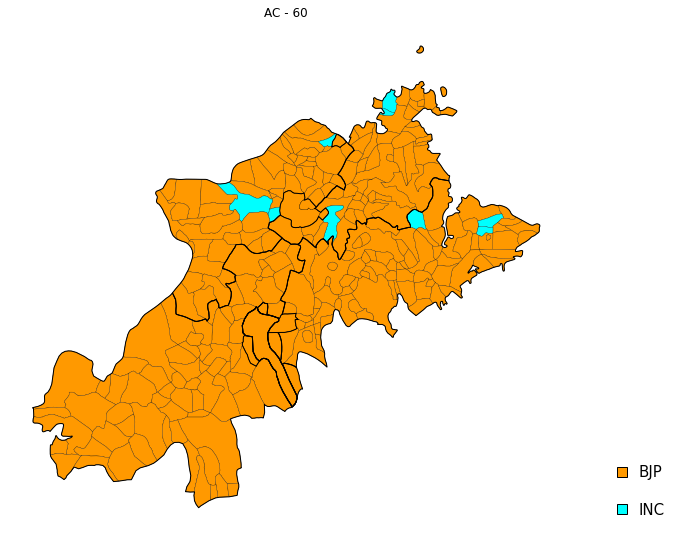

In [394]:
final_ = final_.fillna('0')


for ac in final_['AC'].unique()[:]:
    
    try:
        final_1 = final_.loc[final_['AC']==ac]
        vill_shp_1 = vill_shp.loc[vill_shp['AC_POST']==ac]

        fig, ax = plt.subplots(1,1, figsize=(10,10))
    #     ax.xaxis.set_visible(False)
    #     ax.yaxis.set_visible(False)

        df = pd.merge(vill_shp_1, final_, right_on='Village ID', left_on='OID_', how='left').drop(['Village ID','AC','AC_NAME_PO'], axis=1)

        condition_list_1 = [df['Rank 1 Party'] == 'BJP',
                              df['Rank 1 Party'] == 'INC',
                              df['Rank 1 Party'] == 'BSP',
                               ~df['Rank 1 Party'].isin(['BJP','INC','BSP'])]
        choice_list_1 = ['#FF9900','#00FFFF','#D3D3D3','#E75480']

        df['Hexcode_Rank 1 Party'] = np.select(condition_list_1,choice_list_1)

        color_dict = dict(df[['Rank 1 Party','Hexcode_Rank 1 Party']].values)

        df.plot(ax=ax, column='Rank 1 Party', color= df['Hexcode_Rank 1 Party'] ,linewidth=0.25, edgecolor='black')

        df['geometry'] = df['geometry'].apply(make_valid)
        df_mandal_shp = df.dissolve('Mandal',as_index=False)

        # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        df_mandal_shp.boundary.plot(ax=ax, color=None ,linewidth=1.0, edgecolor='black')
        plt.title(f'AC - {ac}')

        lines = [Line2D([0], [0], marker="s", markersize=10,
                        markeredgecolor='black', linewidth=0,color=c) for c in color_dict.values()]
        labels = [x for x in color_dict.keys()]

        plt.legend(lines,labels,prop={'size': 15},framealpha=0,handletextpad=0.1,
                       bbox_to_anchor=(1.05,0), loc="lower left",labelspacing=1.5)

        ax.axis('off')
        plt.savefig(r'D:\NaMo\Madhya Pradesh\Census Maps\Maps\Coodinates Maps\AC Wise Win Loss'+'\\'+'AC_'+str(ac)+'.png',bbox_inches='tight',dpi=400)
        
    except Exception as ee:
        print('AC:',ac,ee)

In [289]:
final_

AC  Village ID Village Name  Mandal  \
0    1        2730      Bagdiya  Manpur   
1    1        2527    Khirkhiri  Manpur   
2    1        2612       Biloni  Manpur   
3    1        2670    Khojipura  Manpur   
4    1        2736       Dhodar  Manpur   
..  ..         ...          ...     ...   
59  10         777            0       0   
60  10         796            0       0   
61  10         811            0       0   
62  10         888            0       0   
63  10         895            0       0   

                                             Locality  \
0   ति‍ल्‍लीडेरा TILLIDERA + बगदरी BAGADARI + बगदि...   
1                                       विलोनी BILONY   
2                                       विलोनी BILONY   
3                   ढोढर DHODHAR + खोजीपुरा KHOJIPURA   
4                                 हांसिलपुर HANSILPUR   
..                                                ...   
59                                         द्वार DVAR   
60                                         द्वार DVAR   
61                                         द्वार DVAR   
62                                         द्वार DVAR   
63                                         द्वार DVAR   

                                      Mapped Locality      2019 Mapped PS  \
0                                     बगदिया bagadiya  1+11+12+13+14+16+8   
1                                   खिरखिरी khirkhiri                   2   
2                                       विलोनी bilony                   2   
3                                  खोजीपुरा khojipura           3+4+5+6+7   
4                                        ढोढर dhodhar                10+9   
..                                                ...                 ...   
59                                         द्वार dvar                 295   
60                      टेहनगुर नं. 1 tehanagur no. 1                 295   
61                              डूंगरपुरा dungarapura                 295   
62                                           ओझा ojha                 295   
63  जखमोली नं.1 jakhamoli no.1&&जखमोली नं.1 jakham...                 295   

   Nearest Neighbour                   Nearest Villages  Total Votes  \
0                0.0       Bagdari, Nasirpur, Padampura       4272.0   
1                1.0          Biloni, Khojipura, Dhodar        418.0   
2                0.0      Khirkhiri, Khojipura, Bagdari        418.0   
3                0.0         Dhodar, Padampura, Bagdari       2761.0   
4                0.0    Padampura, Khojipura, Hansalpur       1022.0   
..               ...                                ...          ...   
59               1.0            Sanawai, Tehangur, Ojha        436.0   
60               1.0  Ojha, Doongarpura, Behad Ki Jameh        436.0   
61               1.0     Ojha, Behad Ki Jameh, Tehangur        436.0   
62               1.0    Doongarpura, Tehangur, Jakhmoli        436.0   
63               0.0        Ojha, Doongarpura, Nayagaon        436.0   

   Rank 1 Party  Rank 1 Votes Rank 2 Party  Rank 2 Votes  BJP Votes  \
0           BJP        2817.0          INC         941.0     2817.0   
1           BJP         267.0          INC         104.0      267.0   
2           BJP         267.0          INC         104.0      267.0   
3           BJP        1528.0          INC         845.0     1528.0   
4           BJP         517.0          INC         422.0      517.0   
..          ...           ...          ...           ...        ...   
59          BSP         245.0          BJP         131.0      131.0   
60          BSP         245.0          BJP         131.0      131.0   
61          BSP         245.0          BJP         131.0      131.0   
62          BSP         245.0          BJP         131.0      131.0   
63          BSP         245.0          BJP         131.0      131.0   

    BJP Vote Share %  BJP Margin Votes  BJP Margin %  
0              65.94            1876.0         43.91  
1              63.88             163.0         39

<AxesSubplot:>

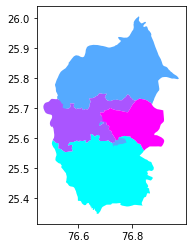

In [66]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

df_mandal_shp.plot(cmap='cool')

### Plotting Maps using Folium

In [679]:
vill_shp

OID_  AC_POST AC_NAME_PO       NAME11  \
0          0        8      Ambah    Ludhawali   
1          1        8      Ambah       Bindwa   
2          2        8      Ambah  Ratan Basai   
3          3        8      Ambah      Rachhed   
4          4        8      Ambah       Raipur   
...      ...      ...        ...          ...   
56398  57369      180  Burhanpur     Morjhira   
56399  57370      180  Burhanpur        Gadhi   
56400  57371      180  Burhanpur       Jamthi   
56401  57372      180  Burhanpur        Sarai   
56402  57373        8      Ambah        Useth   

                                                geometry  
0      POLYGON ((78.34131 26.86485, 78.34151 26.86362...  
1      POLYGON ((78.37589 26.80898, 78.37615 26.80994...  
2      POLYGON ((78.18221 26.79842, 78.17918 26.80278...  
3      POLYGON ((78.27531 26.82826, 78.27629 26.82761...  
4      POLYGON ((78.43718 26.78249, 78.43639 26.78085...  
...                                                  ...  
56398  POLYGON ((76.22394 21.14279, 76.22398 21.14086...  
56399  POLYGON ((76.37275 21.09870, 76.36725 21.09821...  
56400  POLYGON ((76.31535 21.12525, 76.31604 21.12519...  
56401  POLYGON ((76.37099 21.10606, 76.37574 21.10920...  
56402  POLYGON ((78.35336 26.81909, 78.35070 26.82036...  

[56403 rows x 5 columns]

In [723]:
m = folium.Map(location=[22.9734,78.6569],tiles='cartodb positron',zoom_start=8)

In [724]:
ac_ = 53

In [725]:
# filtering Village shape file according to ac_

vill_shp_1 = vill_shp.groupby(['AC_POST']).get_group(ac_)

In [726]:
# filtering PS coordinate shape file according to ac_

ps_cord_1 = ps_cord.groupby(['AC No']).get_group(ac_)

In [727]:
# Converting ps_csv to GDF

ps_cord_gdf = gd.GeoDataFrame(ps_cord_1, geometry=gd.points_from_xy(ps_cord_1.Longitude, ps_cord_1.Latitide))
ps_cord_gdf = ps_cord_gdf.set_crs(epsg=4326)

In [728]:
# Adding Village shape files on top

fg1 = folium.FeatureGroup(name='villages')
for _,r in vill_shp_1.iterrows():
    sim_geo = gd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_json = (folium.GeoJson(data=geo_j,\
                            style_function=lambda x: {'fillColor': 'green','color':'black','weight':'1.5','fillOpacity':'0.1'}))
    folium.Popup(r['NAME11']).add_to(geo_json)
    fg1.add_child(geo_json)
m.add_child(fg1)

In [730]:
# Adding Polling Station

fg2 = folium.FeatureGroup(name='PS Station')
for i in ps_cord_gdf.index:
    fg2.add_child(folium.Marker(location=[ps_cord_gdf['Latitide'][i],ps_cord_gdf['Longitude'][i]],\
        popup="PS Name"+":-"+str(ps_cord_gdf['Point'][i])
        ))
m.add_child(fg2)

In [731]:
ac_shp_1 = ac_shp.groupby(['AC_NO']).get_group(ac_)

sim_geo = gd.GeoSeries(ac_shp_1['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {
                       'fillColor': 'None', 'color': 'black', 'lineCap': 'round','weight':1.5})
geo_j.add_to(m)
folium.LayerControl().add_to(m)

In [732]:
m.save(r'D:\NaMo\Madhya Pradesh\Census Maps\MP_53.html')

In [733]:
m

In [273]:
# merging Village shape file and booth coordinates

vill_ps_cord_shp = s_join(ps_cord_gdf, vill_shp_1).fillna('0')

In [274]:
vill_ps_cord_shp

State District AC No   PS                  Point Longitude  \
358  MadhyaPradesh    Bhind    10    5           5 - RACHHEDI    78.865   
360  MadhyaPradesh    Bhind    10    4         4 - KALYANPURA   78.8442   
377  MadhyaPradesh    Bhind    10   12  12 - KACHONGARA NO. 5   78.8712   
377  MadhyaPradesh    Bhind    10    9   9 - KACHONGARA NO. 2   78.8671   
377  MadhyaPradesh    Bhind    10   10    10 - KACHONGARA NO.   78.8671   
..             ...      ...   ...  ...                    ...       ...   
802  MadhyaPradesh    Bhind    10  283   283 - NAYAGANV NO. 1   79.0168   
811              0        0     0    0                      0         0   
888              0        0     0    0                      0         0   
893              0        0     0    0                      0         0   
895  MadhyaPradesh    Bhind    10  295             295 - DVAR   79.0424   

    Latitide  OID_  AC_POST AC_NAME_PO       NAME11  \
358  26.5994   358       10      Bhind     Rachhedi   
360  26.5778   360       10      Bhind     Bilohara   
377  26.5711   377       10      Bhind    Kachogara   
377  26.5711   377       10      Bhind    Kachogara   
377  26.5711   377       10      Bhind    Kachogara   
..       ...   ...      ...        ...          ...   
802  26.4341   802       10      Bhind     Nayagaon   
811        0   811       10      Bhind  Doongarpura   
888        0   888       10      Bhind         Ojha   
893        0   893       10      Bhind        Madai   
895  26.3993   895       10      Bhind     Jakhmoli   

                                              geometry  
358  POLYGON ((78.82905 26.57979, 78.83035 26.58000...  
360  POLYGON ((78.83551 26.57029, 78.84586 26.58256...  
377  POLYGON ((78.88390 26.57927, 78.87079 26.56113...  
377  POLYGON ((78.88390 26.57927, 78.87079 26.56113...  
377  POLYGON ((78.88390 26.57927, 78.87079 26.56113...  
..                                                 ...  
802  POLYGON ((79.03096 26.43943, 79.03229 26.43727...  
811  POLYGON ((79.04017 26.42725, 79.04733 26.43223...  
888  POLYGON ((79.07190 26.39986, 79.06911 26.40027...  
893  POLYGON ((79.01743 26.40903, 79.01732 26.40912...  
895  POLYGON ((79.04758 26.39754, 79.04683 26.39642...  

[308 rows x 12 columns]

In [275]:
# filtering unmapped Villages

unmapped_vill_ps_shp = vill_ps_cord_shp.loc[vill_ps_cord_shp['AC No']=='0']

In [276]:
unmapped_vill_ps_shp

State District AC No PS Point Longitude Latitide  OID_  AC_POST  \
425     0        0     0  0     0         0        0   425       10   
485     0        0     0  0     0         0        0   485       10   
493     0        0     0  0     0         0        0   493       10   
517     0        0     0  0     0         0        0   517       10   
570     0        0     0  0     0         0        0   570       10   
597     0        0     0  0     0         0        0   597       10   
640     0        0     0  0     0         0        0   640       10   
642     0        0     0  0     0         0        0   642       10   
665     0        0     0  0     0         0        0   665       10   
673     0        0     0  0     0         0        0   673       10   
677     0        0     0  0     0         0        0   677       10   
696     0        0     0  0     0         0        0   696       10   
702     0        0     0  0     0         0        0   702       10   
738     0        0     0  0     0         0        0   738       10   
754     0        0     0  0     0         0        0   754       10   
757     0        0     0  0     0         0        0   757       10   
763     0        0     0  0     0         0        0   763       10   
768     0        0     0  0     0         0        0   768       10   
777     0        0     0  0     0         0        0   777       10   
785     0        0     0  0     0         0        0   785       10   
796     0        0     0  0     0         0        0   796       10   
811     0        0     0  0     0         0        0   811       10   
888     0        0     0  0     0         0        0   888       10   
893     0        0     0  0     0         0        0   893       10   

    AC_NAME_PO           NAME11  \
425      Bhind          Kanavar   
485      Bhind             Kiti   
493      Bhind           Jamana   
517      Bhind      Shalingpura   
570      Bhind       Chandupura   
597      Bhind            Akaha   
640      Bhind           Sarsai   
642      Bhind           Madnai   
665      Bhind         Motipura   
673      Bhind           Pewali   
677      Bhind        Garhisita   
696      Bhind              Kot   
702      Bhind             Rora   
738      Bhind        Bisalpura   
754      Bhind      Harki Jameh   
757      Bhind        Puradumna   
763      Bhind   Behad Ki Jameh   
768      Bhind          Sanawai   
777      Bhind             Dwar   
785      Bhind  Khera Shyampura   
796      Bhind         Tehangur   
811      Bhind      Doongarpura   
888      Bhind             Ojha   
893      Bhind            Madai   

                                              geometry  
425  POLYGON ((79.00855 26.55620, 79.00795 26.55580...  
485  POLYGON ((78.96884 26.53660, 78.96490 26.53216...  
493  POLYGON ((78.81983 26.52137, 78.81461 26.52163...  
517  POLYGON ((78.76955 26.53918, 78.77116 26.53867...  
570  POLYGON ((78.77045 26.49382, 78.76624 26.49521...  
597  POLYGON ((78.93479 26.48939, 78.93455 26.49003...  
640  POLYGON ((79.06236 26.49500, 79.06217 26.49425...  
642  POLYGON ((79.03910 26.45144, 79.03937 26.45192...  
665  POLYGON ((78.96680 26.45978, 78.96618 26.46385...  
673  POLYGON ((78.98652 26.47750, 78.99286 26.48107...  
677  POLYGON ((78.98224 26.48110, 78.98468 26.47917...  
696  POLYGON ((79.01608 26.47352, 79.02154 26.47056...  
702  POLYGON ((79.02807 26.46777, 79.02906 26.46739...  
738  POLYGON ((78.95960 26.45365, 78.96204 26.45709...  
754  POLYGON ((79.03910 26.45144, 79.03537 26.44485...  
757  POLYGON ((78.95443 26.43074, 78.95023 26.43404...  
763  POLYGON ((79.03910 26.45144, 79.04117 26.44945...  
768  POLYGON ((79.10030 26.41188, 79.10287 26.41543...  
777  POLYGON ((79.10155 26.40951, 79.10207 26.40978...  
785  POLYGON ((78.91927 26.42266, 78.91724 26.42242...  
796  POLYGON ((79.08239 26.44021, 79.08241 26.43992...  
811  POLYGON ((79.04017 26.42725, 79.04733 26.43223...  
888  POLYGON ((79.07190 26.39986, 79.0691

In [278]:
# adding centroid to unmapped villages

unmapped_vill_shp = add_centroid(unmapped_vill_ps_shp).drop(['State','District','AC No','Longitude','Latitide','PS'], axis=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [279]:
unmapped_vill_shp

Point  OID_  AC_POST AC_NAME_PO           NAME11  \
425     0   425       10      Bhind          Kanavar   
485     0   485       10      Bhind             Kiti   
493     0   493       10      Bhind           Jamana   
517     0   517       10      Bhind      Shalingpura   
570     0   570       10      Bhind       Chandupura   
597     0   597       10      Bhind            Akaha   
640     0   640       10      Bhind           Sarsai   
642     0   642       10      Bhind           Madnai   
665     0   665       10      Bhind         Motipura   
673     0   673       10      Bhind           Pewali   
677     0   677       10      Bhind        Garhisita   
696     0   696       10      Bhind              Kot   
702     0   702       10      Bhind             Rora   
738     0   738       10      Bhind        Bisalpura   
754     0   754       10      Bhind      Harki Jameh   
757     0   757       10      Bhind        Puradumna   
763     0   763       10      Bhind   Behad Ki Jameh   
768     0   768       10      Bhind          Sanawai   
777     0   777       10      Bhind             Dwar   
785     0   785       10      Bhind  Khera Shyampura   
796     0   796       10      Bhind         Tehangur   
811     0   811       10      Bhind      Doongarpura   
888     0   888       10      Bhind             Ojha   
893     0   893       10      Bhind            Madai   

                                              geometry  \
425  POLYGON ((79.00855 26.55620, 79.00795 26.55580...   
485  POLYGON ((78.96884 26.53660, 78.96490 26.53216...   
493  POLYGON ((78.81983 26.52137, 78.81461 26.52163...   
517  POLYGON ((78.76955 26.53918, 78.77116 26.53867...   
570  POLYGON ((78.77045 26.49382, 78.76624 26.49521...   
597  POLYGON ((78.93479 26.48939, 78.93455 26.49003...   
640  POLYGON ((79.06236 26.49500, 79.06217 26.49425...   
642  POLYGON ((79.03910 26.45144, 79.03937 26.45192...   
665  POLYGON ((78.96680 26.45978, 78.96618 26.46385...   
673  POLYGON ((78.98652 26.47750, 78.99286 26.48107...   
677  POLYGON ((78.98224 26.48110, 78.98468 26.47917...   
696  POLYGON ((79.01608 26.47352, 79.02154 26.47056...   
702  POLYGON ((79.02807 26.46777, 79.02906 26.46739...   
738  POLYGON ((78.95960 26.45365, 78.96204 26.45709...   
754  POLYGON ((79.03910 26.45144, 79.03537 26.44485...   
757  POLYGON ((78.95443 26.43074, 78.95023 26.43404...   
763  POLYGON ((79.03910 26.45144, 79.04117 26.44945...   
768  POLYGON ((79.10030 26.41188, 79.10287 26.41543...   
777  POLYGON ((79.10155 26.40951, 79.10207 26.40978...   
785  POLYGON ((78.91927 26.42266, 78.91724 26.42242...   
796  POLYGON ((79.08239 26.44021, 79.08241 26.43992...   
811  POLYGON ((79.04017 26.42725, 79.04733 26.43223...   
888  POLYGON ((79.07190 26.39986, 79.06911 26.40027...   
893  POLYGON ((79.01743 26.40903, 79.01732 26.40912...   

                      centroid  
425  POINT (78.98122 26.55709)  
485  POINT (78.95841 26.53196)  
493  POINT (78.82855 26.53191)  
517  POINT (78.76127 26.53075)  
570  POINT (78.76666 26.50584)  
597  POINT (78.94820 26.49961)  
640  POINT (79.04422 26.47392)  
642  POINT (79.05876 26.47025)  
665  POINT (78.96395 26.47304)  
673  POINT (79.00070 26.47547)  
677  POINT (78.98173 26.47211)  
696  POINT (79.00322 26.46551)  
702  POINT (79.01804 26.45713)  
738  POINT (78.97830 26.45365)  
754  POINT (79.02676 26.44624)  
757  POINT (78.95504 26.44336)  
763  POINT (79.05085 26.44034)  
768  POINT (79.10390 26.43205)  
777  POINT (79.12040 26.42354)  
785  POINT (78.90242 26.42942)  
796  POINT (79.07255 26.41906)  
811  POINT (79.04662 26.42231)  
888  POINT (79.05278 26.40672)  
893  POINT (78.99614 26.40624)

In [281]:
# finding nearest nighbour for unmapped villages

mapped_vill_ps_cord = nearest(unmapped_vill_shp,ps_cord_gdf)

In [282]:
mapped_vill_ps_cord

State District  AC No   PS                  Point  Longitude  \
0   MadhyaPradesh    Bhind     10  266     266 - PANDARI NO.2  79.005285   
1   MadhyaPradesh    Bhind     10  265     265 - PANDARI NO.1  78.949609   
2   MadhyaPradesh    Bhind     10   29        29 - JAMNA NO.2  78.815776   
3   MadhyaPradesh    Bhind     10  205     205 - BIJPURI NO.2  78.752475   
4   MadhyaPradesh    Bhind     10  206  206 - CHANDUPURA NO.1  78.752061   
5   MadhyaPradesh    Bhind     10  254      254 - UMARI NO. 5  78.952202   
6   MadhyaPradesh    Bhind     10  269    269 - RAMPURA  NO.2  79.033252   
7   MadhyaPradesh    Bhind     10  269    269 - RAMPURA  NO.2  79.033252   
8   MadhyaPradesh    Bhind     10  244       244 - MOTIPURA.2  78.962495   
9   MadhyaPradesh    Bhind     10  271           271 - PEVALI  79.011406   
10  MadhyaPradesh    Bhind     10  245      245 - GUSING NO.1  78.976642   
11  MadhyaPradesh    Bhind     10  279     279 - SAGARA NO. 2  79.015290   
12  MadhyaPradesh    Bhind     10  279     279 - SAGARA NO. 2  79.015290   
13  MadhyaPradesh    Bhind     10  245      245 - GUSING NO.1  78.976642   
14  MadhyaPradesh    Bhind     10  285     285 - NAYAGANV NA3  79.017003   
15  MadhyaPradesh    Bhind     10  238        238 - ATARASUMA  78.967174   
16  MadhyaPradesh    Bhind     10  284   284 - NAYAGANV NO. 2  79.017045   
17  MadhyaPradesh    Bhind     10  295             295 - DVAR  79.042443   
18  MadhyaPradesh    Bhind     10  295             295 - DVAR  79.042443   
19  MadhyaPradesh    Bhind     10  234    234 - DHOCHARA NO.1  78.934688   
20  MadhyaPradesh    Bhind     10  295             295 - DVAR  79.042443   
21  MadhyaPradesh    Bhind     10  295             295 - DVAR  79.042443   
22  MadhyaPradesh    Bhind     10  295             295 - DVAR  79.042443   
23  MadhyaPradesh    Bhind     10  281    281 - KAKAHARA NO.1  78.984304   

     Latitide Point  OID_  AC_POST AC_NAME_PO           NAME11  \
0   26.537725     0   425       10      Bhind          Kanavar   
1   26.528441     0   485       10      Bhind             Kiti   
2   26.535475     0   493       10      Bhind           Jamana   
3   26.534156     0   517       10      Bhind      Shalingpura   
4   26.513479     0   570       10      Bhind       Chandupura   
5   26.489907     0   597       10      Bhind            Akaha   
6   26.485564     0   640       10      Bhind           Sarsai   
7   26.485564     0   642       10      Bhind           Madnai   
8   26.483068     0   665       10      Bhind         Motipura   
9   26.481634     0   673       10      Bhind           Pewali   
10  26.461677     0   677       10      Bhind        Garhisita   
11  26.474815     0   696       10      Bhind              Kot   
12  26.474815     0   702       10      Bhind             Rora   
13  26.461677     0   738       10      Bhind        Bisalpura   
14  26.434017     0   754       10      Bhind      Harki Jameh   
15  26.442350     0   757       10      Bhind        Puradumna   
16  26.433947     0   763       10      Bhind   Behad Ki Jameh   
17  26.399347     0   768       10      Bhind          Sanawai   
18  26.399347     0   777       10      Bhind             Dwar   
19  26.444539     0   785       10      Bhind  Khera Shyampura   
20  26.399347     0   796       10      Bhind         Tehangur   
21  26.399347     0   811       10      Bhind      Doongarpura   
22  26.399347     0   888       10      Bhind             Ojha   
23  26.413053     0   893       10      Bhind            Madai   

                                             geometry  \
0   POLYGON ((79.00855 26.55620, 79.00795 26.55580...   
1   POLYGON ((78.96884 26.53660, 78.96490 26.53216...   
2   POLYGON ((78.81983 26.52137, 78.81461 26.52163...   
3   POLYGON ((78.76955 26.53918, 78.77116 26.53867...   
4   POLYGON ((78.77045 26.49382, 78.76624 26.49521...   
5   POLYGON ((78.93479 26.48939, 78.93455 26.49003...   
6   POLYGON ((79.06236 26.49500, 79.06217 26.49425...   
7   

In [283]:
ac_ps_vill = pd.concat([vill_ps_cord_shp.loc[vill_ps_cord_shp['AC No']!='0'][['AC No','PS','OID_','NAME11']], mapped_vill_ps_cord[['AC No','PS','OID_','NAME11']]])

In [284]:
ac_ps_vill['AC No'] = ac_ps_vill['AC No'].astype(int)
ac_ps_vill['PS'] = ac_ps_vill['PS'].astype(int)

ac_ps_vill = ac_ps_vill.sort_values(by='PS')

In [301]:
ac_ps_vill

AC No   PS  OID_       NAME11
383     10    1   383    Bhind (M)
360     10    4   360     Bilohara
358     10    5   358     Rachhedi
383     10    6   383    Bhind (M)
444     10    7   444    Kiratpura
..     ...  ...   ...          ...
895     10  295   895     Jakhmoli
20      10  295   796     Tehangur
21      10  295   811  Doongarpura
22      10  295   888         Ojha
383     10  296   383    Bhind (M)

[308 rows x 4 columns]

In [298]:
ac_ps_vill_1 = ac_ps_vill.groupby(['AC No','OID_','NAME11'], as_index=False).agg({'PS':lambda x: "+".join(set(map(str,x)))})

In [299]:
ac_ps_vill_1['PS'] = ac_ps_vill_1['PS'].astype(str)
ac_ps_vill_1['PS'] = ac_ps_vill_1['PS'].str.split('+').apply(lambda x: '+'.join(sorted(x)))
ac_ps_vill_1['temp'] = ac_ps_vill_1['PS'].str.split('+').str.get(0)
ac_ps_vill_1['temp'] = ac_ps_vill_1['temp'].astype(float).astype(int)
ac_ps_vill_1 = ac_ps_vill_1.sort_values(by=['AC No','temp']).drop(['temp'], axis=1)

In [300]:
ac_ps_vill_1

AC No  OID_       NAME11  \
3      10   383    Bhind (M)   
1      10   360     Bilohara   
0      10   358     Rachhedi   
2      10   377    Kachogara   
5      10   403      Parsona   
..    ...   ...          ...   
55     10   777         Dwar   
58     10   796     Tehangur   
60     10   811  Doongarpura   
61     10   888         Ojha   
63     10   895     Jakhmoli   

                                                   PS  
3   1+100+101+102+103+104+105+106+107+108+109+110+...  
1                                                   4  
0                                                   5  
2                                     10+11+12+13+8+9  
5                                               14+15  
..                                                ...  
55                                                295  
58                                                295  
60                                                295  
61                                                295  
63                                                295  

[64 rows x 4 columns]